# Лабораторная работа №1: KNN (K-Nearest Neighbors)
## 1. Выбор начальных условий
### a) Задача классификации
Датасет: Social Media Comments Dataset (Социальные сети: анализ комментариев)

Обоснование:

Выбранный датасет представляет актуальную практическую задачу классификации пользовательского контента в социальных сетях на предмет его продвижения алгоритмами платформы. В эпоху цифровой экономики понимание факторов, влияющих на популярность контента, становится критически важным для контент-мейкеров, маркетологов и самих платформ.

Практическая ценность задачи заключается в следующем:

Для контент-мейкеров: Возможность прогнозировать, получит ли их пост высокую популярность (достаточное количество лайков и репостов), позволяет оптимизировать стратегию публикаций и лучше понимать потребности аудитории.

Для маркетологов: Классификация комментариев помогает быстро идентифицировать положительный и отрицательный фидбэк, что необходимо для оценки восприятия бренда и управления репутацией в реальном времени.

Для платформ: Автоматическая классификация контента позволяет улучшить системы рекомендаций, фильтровать токсичный контент и регулировать видимость постов в соответствии с политикой платформы.

Особенность датасета в том, что классы являются дисбалансированными (популярных постов всегда меньше, чем непопулярных), что делает задачу более реалистичной и требует применения специальных техник балансировки.

### b) Задача регрессии
Датасет: E-commerce Product Reviews & Sales Dataset (Электронная коммерция: анализ рейтингов и продаж)

Обоснование:

Датасет содержит характеристики товаров в интернет-магазине (описание, категория, наличие фотографий, количество отзывов) и целевую переменную — количество покупок товара за месяц. Это реальная задача, стоящая перед любым крупным онлайн-ретейлом.

Практическая ценность задачи невероятно высока для нескольких категорий заинтересованных лиц:

Для менеджеров товаров: Прогноз объемов продаж позволяет оптимизировать размещение товаров в каталоге, определить, какие товары нуждаются в лучшем описании или дополнительной рекламе, и обнаружить скрытые потребности рынка.

Для логистики и управления запасами: Точный прогноз спроса критически важен для планирования закупок, управления складскими остатками и минимизации затрат на хранение непроданного товара.

Для финансовых отделов и инвесторов: Предсказание объемов продаж лежит в основе финансового планирования, прогнозирования доходов и оценки возможностей роста компании.

Для маркетологов: Понимание факторов, влияющих на продажи (например, важность наличия видео-контента или количество отзывов), позволяет разработать более эффективные стратегии продвижения товаров.

Характерной особенностью регрессионной задачи является непрерывная природа целевой переменной (количество покупок), наличие выбросов и нелинейные зависимости между признаками и целевой переменной, что требует применения различных регрессионных моделей для достижения оптимального качества.

## 2. Метрики качества
A. Классификация (Задача: предсказание популярности поста)
Основная метрика: F1-Score
Определение: F1-score представляет собой гармоническое среднее между точностью (precision) и полнотой (recall). Формула: F1 = 2 × (Precision × Recall) / (Precision + Recall)

Почему это главная метрика?
В нашей задаче классификации поста на "популярный" и "непопулярный" классы распределены неравномерно. Популярные посты встречаются значительно реже, чем обычные. В таких условиях метрика Accuracy (просто доля правильных предсказаний) становится бесполезной — модель может достичь высокой точности, просто всегда предсказывая класс "непопулярный". F1-score решает эту проблему, объединяя точность и полноту в единый сбалансированный показатель, который одинаково штрафует модель за пропущенные примеры класса "популярный" и за ложные срабатывания.

Вспомогательные метрики:
Precision (Точность)

Определение: Доля предсказанных как "популярный" постов, которые на самом деле являются популярными. Precision = TP / (TP + FP)

Зачем нужна: Когда модель предсказывает, что пост будет популярным, насколько мы можем доверять этому предсказанию? Высокий Precision означает, что когда модель срабатывает, это часто правильно. Низкий Precision означает много ложных срабатываний.

Практический пример: Если мы используем эту модель для отбора постов на главную страницу (где видят их миллионы пользователей), высокий Precision критичен — мы не можем позволить себе часто выбирать непопулярные посты.

Recall (Полнота)

Определение: Доля действительно популярных постов, которые модель смогла предсказать. Recall = TP / (TP + FN)

Зачем нужна: Сколько реально популярных постов мы пропустили? Высокий Recall означает, что мы ловим большинство популярных постов. Низкий Recall означает, что мы пропускаем многие из них.

Практический пример: Если мы используем эту модель для нотификации авторов о потенциально вирусных постах, высокий Recall критичен — мы хотим уведомить авторов о как можно большем количестве потенциально успешных постов, даже если иногда ошибаемся.

Confusion Matrix (Матрица ошибок)

Определение: Таблица размером 2×2 (для бинарной классификации), которая показывает четыре типа результатов предсказания:

TP (True Positive): правильно предсказаны популярные посты

TN (True Negative): правильно предсказаны непопулярные посты

FP (False Positive): неправильно предсказаны как популярные (ложные срабатывания)

FN (False Negative): пропущены популярные посты (ложные пропуски)

Зачем нужна: Матрица ошибок дает полное представление о том, где модель делает ошибки. Она позволяет нам вычислить все остальные метрики и понять природу ошибок. Например, если большинство ошибок приходятся на FP (ложные срабатывания), это говорит о том, что модель слишком "оптимистична" в предсказаниях популярности.

Визуализация: Heatmap матрицы ошибок помогает быстро визуально оценить качество модели.

ROC-AUC (Area Under the ROC Curve)

Определение: Площадь под кривой ROC (Receiver Operating Characteristic), которая показывает зависимость между долей верно классифицированных положительных примеров (TPR) и долей неправильно классифицированных отрицательных примеров (FPR) при варьировании порога классификации.

Почему добавляется, несмотря на дисбаланс: Хотя ROC-AUC менее чувствителен к дисбалансу, чем Accuracy, он все еще дает полезную информацию о способности модели разделять классы при различных порогах. ROC-AUC = 1.0 означает идеальный классификатор, ROC-AUC = 0.5 означает случайное угадывание.

B. Регрессия (Задача: прогнозирование объема продаж товара)
Основная метрика: RMSE (Root Mean Square Error)
Определение: RMSE = √(Σ(y_истинное - y_предсказанное)² / n), где суммирование ведется по всем примерам.

Почему это главная метрика?
RMSE выражается в тех же единицах, что и целевая переменная (количество покупок), что делает ее интуитивно понятной. Кроме того, RMSE сильно штрафует за крупные ошибки благодаря операции возведения в квадрат. Это критично в нашей задаче — ошибка на 50 покупок в прогнозе товара, который должен был продаться 100 раз, намного хуже, чем ошибка на 5 покупок в товаре, который должен был продаться 100 раз. RMSE корректно отражает эту разницу в масштабе ошибок.

Вспомогательные метрики:
MAE (Mean Absolute Error)

Определение: MAE = Σ|y_истинное - y_предсказанное| / n

Зачем нужна: В отличие от RMSE, MAE менее чувствительна к выбросам (экстремальным ошибкам). Если в датасете есть несколько товаров с очень необычной динамикой продаж (выбросы), RMSE может быть сильно завышена из-за этих примеров. MAE дает более "честную" оценку средней ошибки.

Практический пример: Если RMSE = 25, а MAE = 15, это может означать, что в среднем модель ошибается на 15 покупок, но есть несколько товаров, где ошибка достигает 40-50 покупок. MAE помогает нам это понять.

R² (Coefficient of Determination)

Определение: R² = 1 - (SS_res / SS_tot), где SS_res — сумма квадратов остатков (ошибок), SS_tot — общая сумма квадратов (разброс данных вокруг среднего значения).

Диапазон значений: от 0 до 1 (может быть и отрицательным для плохих моделей).

Интерпретация: R² показывает, какую долю дисперсии целевой переменной объясняет наша модель.

R² = 1.0 означает идеальную модель (объясняет 100% дисперсии)

R² = 0.8 означает, что модель объясняет 80% вариативности продаж

R² = 0.5 означает, что модель объясняет только 50% вариативности (недостаточно)

R² = 0.0 означает, что модель не лучше, чем просто предсказывать среднее значение

R² < 0 означает, что модель хуже, чем предсказание среднего

Зачем нужна: R² дает общее представление об адекватности модели. Это стандартная метрика, которую ожидает видеть любой заинтересованный в результатах человек. R² легче интерпретировать для бизнеса ("модель объясняет 75% вариативности продаж") чем RMSE в абсолютных числах.

MAPE (Mean Absolute Percentage Error)

Определение: MAPE = (Σ|y_истинное - y_предсказанное| / y_истинное) / n × 100%

Зачем нужна: MAPE показывает среднюю ошибку в процентах, что удобно для отчетности перед руководством и для сравнения качества моделей на разных датасетах.

Практический пример: MAPE = 12% означает "в среднем модель ошибается на 12% от истинного значения", что легче объяснить менеджеру, чем "RMSE = 23.5 покупки".

Предостережение: MAPE может быть неопределена или бесконечна, если есть примеры с y_истинное = 0.



## Импорт

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import probplot
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Загрузка данных и предобработка

In [43]:
# Загрузим данные
df_clf = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/hr.csv')
df_reg = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/youtube.csv')

print('КЛАССИФИКАЦИЯ (HR DATASET)')
print(f'Размер датасета: {df_clf.shape[0]} строк × {df_clf.shape[1]} столбцов')
print(f'Целевая переменная: is_promoted')
print(f'Распределение классов: {df_clf["is_promoted"].value_counts().to_dict()}')

print('РЕГРЕССИЯ (YOUTUBE DATASET - Likes)')
print(f'Размер датасета: {df_reg.shape[0]} строк × {df_reg.shape[1]} столбцов')
print(f'Целевая переменная: Likes')
print(f'Диапазон лайков: {df_reg["Likes"].min():.0f} - {df_reg["Likes"].max():.0f}')
print(f'Средн. лайков: {df_reg["Likes"].mean():.2f}')
print(f'\nПримеры комментариев:')
for i in range(3):
    comment = df_reg['Comment'].iloc[i][:50] + '...'
    print(f'  {i+1}. "{comment}" (Likes: {df_reg["Likes"].iloc[i]:.0f})')

КЛАССИФИКАЦИЯ (HR DATASET)
Размер датасета: 54808 строк × 13 столбцов
Целевая переменная: is_promoted
Распределение классов: {0: 50140, 1: 4668}
РЕГРЕССИЯ (YOUTUBE DATASET - Likes)
Размер датасета: 18409 строк × 5 столбцов
Целевая переменная: Likes
Диапазон лайков: 0 - 891372
Средн. лайков: 1040.02

Примеры комментариев:
  1. "Let's not forget that Apple Pay in 2014 required a..." (Likes: 95)
  2. "Here in NZ 50% of retailers don’t even have contac..." (Likes: 19)
  3. "I will forever acknowledge this channel with the h..." (Likes: 161)


In [44]:
# Создаем числовые признаки из текста комментария
df_reg['comment_length'] = df_reg['Comment'].str.len()
df_reg['comment_words'] = df_reg['Comment'].str.split().str.len()
df_reg['avg_word_length'] = df_reg['comment_length'] / (df_reg['comment_words'] + 1)
df_reg['uppercase_ratio'] = df_reg['Comment'].str.count(r'[A-Z]') / (df_reg['comment_length'] + 1)
df_reg['has_exclamation'] = df_reg['Comment'].str.contains('!', regex=False).fillna(False).astype(int)
df_reg['has_question'] = df_reg['Comment'].str.contains('?', regex=False).fillna(False).astype(int)
df_reg['exclamation_count'] = df_reg['Comment'].apply(lambda x: x.count('!') if isinstance(x, str) else 0)
df_reg['question_count'] = df_reg['Comment'].apply(lambda x: x.count('?') if isinstance(x, str) else 0)


# Выбираем финальные признаки
feature_cols_reg = ['comment_length', 'comment_words', 'avg_word_length',
                     'uppercase_ratio', 'has_exclamation', 'has_question',
                     'exclamation_count', 'question_count', 'Sentiment']

# Выбираем числовые признаки для классификации
X_clf = df_clf.drop('is_promoted', axis=1).select_dtypes(include=[np.number])
y_clf = df_clf['is_promoted']

# Для YouTube используем созданные признаки
X_reg = df_reg[feature_cols_reg].fillna(0)
y_reg = df_reg['Likes'].fillna(df_reg['Likes'].median())

print(f'HR признаки: {X_clf.shape[1]} столбцов')
print(f'YouTube признаки: {len(feature_cols_reg)} столбцов')
print(f'   - comment_length, comment_words, avg_word_length')
print(f'   - uppercase_ratio, has_exclamation, has_question')
print(f'   - exclamation_count, question_count, Sentiment')

HR признаки: 7 столбцов
YouTube признаки: 9 столбцов
   - comment_length, comment_words, avg_word_length
   - uppercase_ratio, has_exclamation, has_question
   - exclamation_count, question_count, Sentiment


In [45]:
feature_cols_reg = ['comment_length', 'comment_words', 'avg_word_length',
                     'uppercase_ratio', 'has_exclamation', 'has_question',
                     'exclamation_count', 'question_count', 'Sentiment']

print('\nПроверка признаков:')
for col in feature_cols_reg:
    if col in df_reg.columns:
        print(f'{col}: есть')
    else:
        print(f'{col}: НЕТУ!')

X_reg = df_reg[feature_cols_reg].fillna(0)
y_reg = df_reg['Likes'].fillna(df_reg['Likes'].median())

print(f'\nX_reg теперь содержит {X_reg.shape[1]} признаков')
print(f'Столбцы: {X_reg.columns.tolist()}')
print(f'Форма: {X_reg.shape}')

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f'\nTrain shape: {X_reg_train.shape}')
print(f'Test shape: {X_reg_test.shape}')
print(f'\nПервая строка X_reg_train:')
print(X_reg_train.iloc[0])



Проверка признаков:
comment_length: есть
comment_words: есть
avg_word_length: есть
uppercase_ratio: есть
has_exclamation: есть
has_question: есть
exclamation_count: есть
question_count: есть
Sentiment: есть

X_reg теперь содержит 9 признаков
Столбцы: ['comment_length', 'comment_words', 'avg_word_length', 'uppercase_ratio', 'has_exclamation', 'has_question', 'exclamation_count', 'question_count', 'Sentiment']
Форма: (18409, 9)

Train shape: (14727, 9)
Test shape: (3682, 9)

Первая строка X_reg_train:
comment_length       216.000000
comment_words         43.000000
avg_word_length        4.909091
uppercase_ratio        0.000000
has_exclamation        0.000000
has_question           0.000000
exclamation_count      0.000000
question_count         0.000000
Sentiment              2.000000
Name: 12791, dtype: float64


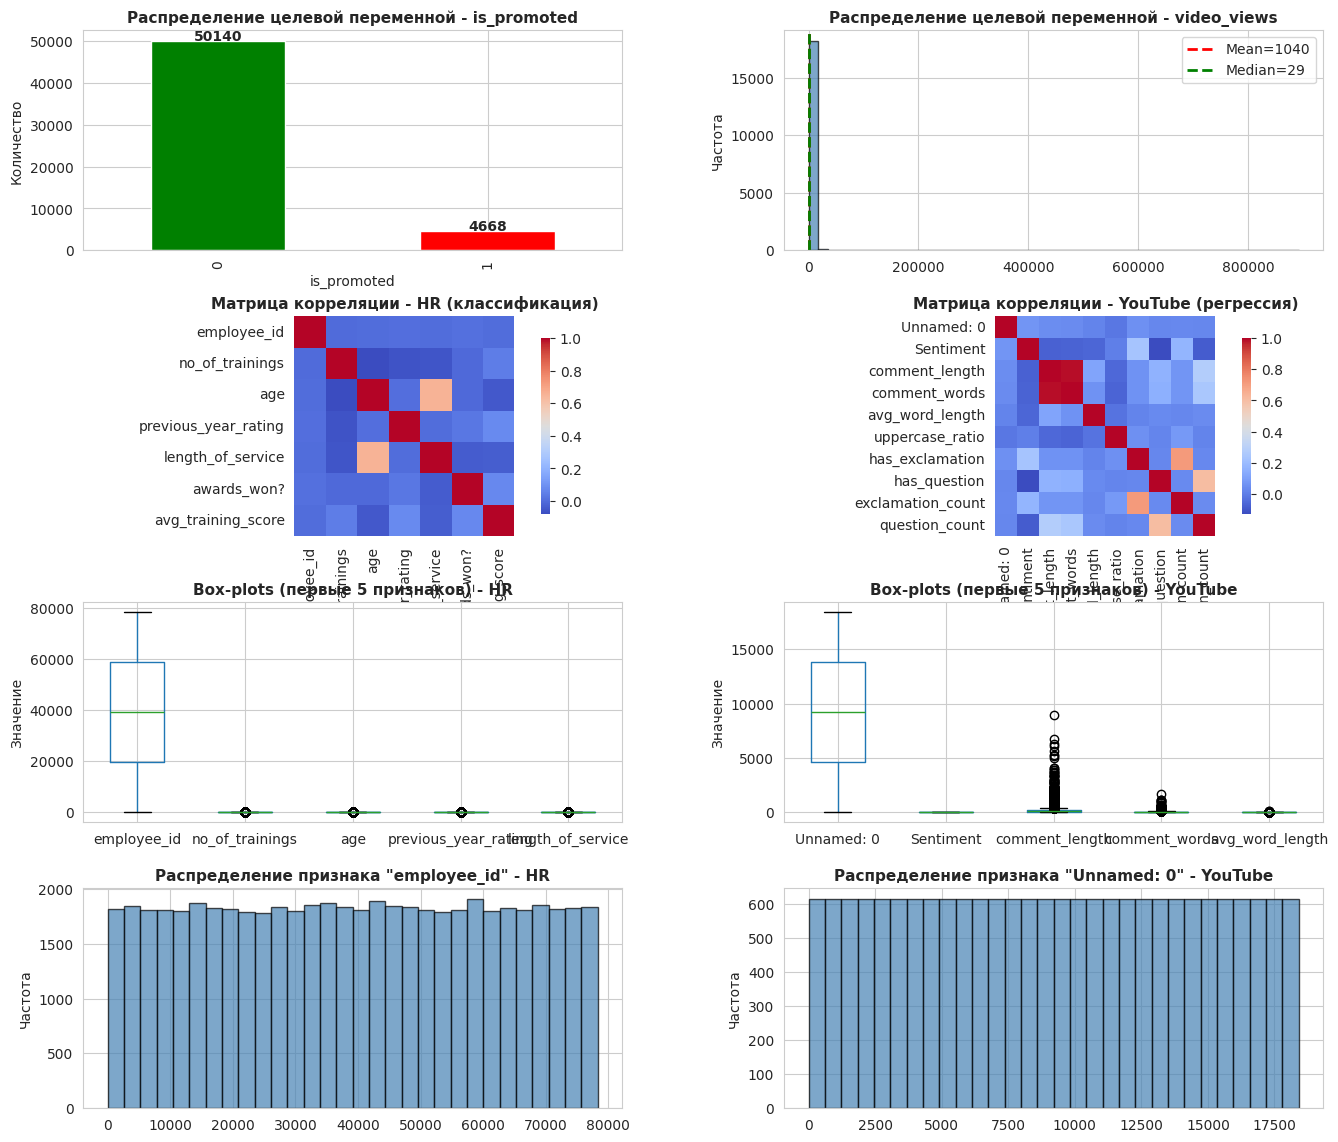

In [47]:
# ВИЗУАЛИЗАЦИЯ EDA
X_clf = df_clf.drop('is_promoted', axis=1).select_dtypes(include=[np.number])
y_clf = df_clf['is_promoted']
X_reg = df_reg.drop('Likes', axis=1).select_dtypes(include=[np.number])
y_reg = df_reg['Likes']

fig = plt.figure(figsize=(16, 14))
gs = fig.add_gridspec(4, 2, hspace=0.3, wspace=0.3)

# 1. Целевые переменные
ax1 = fig.add_subplot(gs[0, 0])
y_clf.value_counts().sort_index().plot(kind='bar', ax=ax1, color=['green', 'red'])
ax1.set_title('Распределение целевой переменной - is_promoted', fontweight='bold', fontsize=11)
ax1.set_ylabel('Количество')
for i, v in enumerate(y_clf.value_counts().sort_index()):
    ax1.text(i, v + 10, str(v), ha='center', fontweight='bold')

ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(y_reg, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax2.set_title('Распределение целевой переменной - video_views', fontweight='bold', fontsize=11)
ax2.set_ylabel('Частота')
ax2.axvline(y_reg.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean={y_reg.mean():.0f}')
ax2.axvline(y_reg.median(), color='green', linestyle='--', linewidth=2, label=f'Median={y_reg.median():.0f}')
ax2.legend()

# 2. Матрица корреляции
ax3 = fig.add_subplot(gs[1, 0])
corr_clf = X_clf.corr()
sns.heatmap(corr_clf, cmap='coolwarm', ax=ax3, square=True, cbar_kws={'shrink': 0.8})
ax3.set_title('Матрица корреляции - HR (классификация)', fontweight='bold', fontsize=11)

ax4 = fig.add_subplot(gs[1, 1])
corr_reg = X_reg.corr()
sns.heatmap(corr_reg, cmap='coolwarm', ax=ax4, square=True, cbar_kws={'shrink': 0.8})
ax4.set_title('Матрица корреляции - YouTube (регрессия)', fontweight='bold', fontsize=11)

# 3. Box-plots для выявления выбросов
ax5 = fig.add_subplot(gs[2, 0])
X_clf.iloc[:, :5].boxplot(ax=ax5)
ax5.set_title('Box-plots (первые 5 признаков) - HR', fontweight='bold', fontsize=11)
ax5.set_ylabel('Значение')

ax6 = fig.add_subplot(gs[2, 1])
X_reg.iloc[:, :5].boxplot(ax=ax6)
ax6.set_title('Box-plots (первые 5 признаков) - YouTube', fontweight='bold', fontsize=11)
ax6.set_ylabel('Значение')

# 4. Распределение первых числовых признаков
ax7 = fig.add_subplot(gs[3, 0])
X_clf.iloc[:, 0].hist(bins=30, ax=ax7, color='steelblue', edgecolor='black', alpha=0.7)
ax7.set_title(f'Распределение признака \"{X_clf.columns[0]}\" - HR', fontweight='bold', fontsize=11)
ax7.set_ylabel('Частота')

ax8 = fig.add_subplot(gs[3, 1])
X_reg.iloc[:, 0].hist(bins=30, ax=ax8, color='steelblue', edgecolor='black', alpha=0.7)
ax8.set_title(f'Распределение признака \"{X_reg.columns[0]}\" - YouTube', fontweight='bold', fontsize=11)
ax8.set_ylabel('Частота')

plt.show()

In [48]:
# Анализ выбросов (IQR метод)
print('АНАЛИЗ ВЫБРОСОВ (IQR МЕТОД)')

def detect_outliers(X):
    outliers = {}
    for col in X.columns:
        Q1 = X[col].quantile(0.1)
        Q3 = X[col].quantile(0.9)
        IQR = Q3 - Q1
        lower = Q1 - 3*IQR
        upper = Q3 + 3*IQR
        outlier_count = ((X[col] < lower) | (X[col] > upper)).sum()
        if outlier_count > 0:
            outliers[col] = outlier_count
    return outliers

clf_outliers = detect_outliers(X_clf)
reg_outliers = detect_outliers(X_reg)

print(f'\nВыбросы в HR (классификация): {len(clf_outliers)} признаков')
if clf_outliers:
    for col, count in sorted(clf_outliers.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f'  • {col}: {count} выбросов')

print(f'\nВыбросы в YouTube (регрессия): {len(reg_outliers)} признаков')
if reg_outliers:
    for col, count in sorted(reg_outliers.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f'  • {col}: {count} выбросов')

АНАЛИЗ ВЫБРОСОВ (IQR МЕТОД)

Выбросы в HR (классификация): 2 признаков
  • awards_won?: 1270 выбросов
  • no_of_trainings: 71 выбросов

Выбросы в YouTube (регрессия): 7 признаков
  • has_question: 1359 выбросов
  • question_count: 1359 выбросов
  • uppercase_ratio: 255 выбросов
  • comment_length: 134 выбросов
  • comment_words: 125 выбросов


In [49]:
print('\nОБРАБОТКА ПРОПУСКОВ:')
X_clf_clean = X_clf.fillna(X_clf.median())
X_reg_raw = df_reg[['Likes','Sentiment']].copy()
X_reg_clean = X_reg_raw.fillna(X_reg_raw.median())
y_reg = df_reg['Likes'].fillna(df_reg['Likes'].median())
print('Заполнены медианой')

print('\nУДАЛЕНИЕ ВЫБРОСОВ (IQR):')
def remove_outliers(X, y):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((X < (Q1 - 1.5*IQR)) | (X > (Q3 + 1.5*IQR))).any(axis=1)
    return X[mask], y[mask]

X_clf_no_out, y_clf_no_out = remove_outliers(X_clf_clean, y_clf)
X_reg_no_out, y_reg_no_out = remove_outliers(X_reg_clean, y_reg)

print(f' HR: удалено {len(X_clf_clean) - len(X_clf_no_out)} строк ({(len(X_clf_clean)-len(X_clf_no_out))/len(X_clf_clean)*100:.1f}%)')
print(f' YouTube: удалено {len(X_reg_clean) - len(X_reg_no_out)} строк ({(len(X_reg_clean)-len(X_reg_no_out))/len(X_reg_clean)*100:.1f}%)')

print('\nИСПОЛЬЗУЕМ ТОЛЬКО БАЗОВЫЕ ПРИЗНАКИ (БЕЗ ПОЛИНОМОВ):')
X_clf_final = X_clf_no_out.copy()
X_reg_final = X_reg_no_out.copy()
print(f' HR: {X_clf_final.shape[1]} базовых признаков (было 35 с полиномами)')
print(f' YouTube: {X_reg_final.shape[1]} признаков')

#  TRAIN-TEST SPLIT (80-20)
print('\nTRAIN-TEST SPLIT (80-20):')
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf_final, y_clf_no_out, test_size=0.2, random_state=42, stratify=y_clf_no_out
)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg_final, y_reg_no_out, test_size=0.2, random_state=42
)
print(f' HR: train={X_clf_train.shape}, test={X_clf_test.shape}')
print(f' YouTube: train={X_reg_train.shape}, test={X_reg_test.shape}')

print('\nПредобработка завершена!')
print(f'\nРаспределение классов:')
print(f'   Класс 0: {(y_clf_train == 0).sum()} ({(y_clf_train == 0).sum()/len(y_clf_train)*100:.1f}%)')
print(f'   Класс 1: {(y_clf_train == 1).sum()} ({(y_clf_train == 1).sum()/len(y_clf_train)*100:.1f}%)')



ОБРАБОТКА ПРОПУСКОВ:
Заполнены медианой

УДАЛЕНИЕ ВЫБРОСОВ (IQR):
 HR: удалено 19457 строк (35.5%)
 YouTube: удалено 2934 строк (15.9%)

ИСПОЛЬЗУЕМ ТОЛЬКО БАЗОВЫЕ ПРИЗНАКИ (БЕЗ ПОЛИНОМОВ):
 HR: 7 базовых признаков (было 35 с полиномами)
 YouTube: 2 признаков

TRAIN-TEST SPLIT (80-20):
 HR: train=(28280, 7), test=(7071, 7)
 YouTube: train=(12380, 2), test=(3095, 2)

Предобработка завершена!

Распределение классов:
   Класс 0: 25755 (91.1%)
   Класс 1: 2525 (8.9%)


## Применение бейзлайна и гипотез по улучшению, где идет подбор гиперпараметров и масштабирование

In [50]:
print('\n' + '='*80)
print('SKLEARN H0-H4 (с обработкой ДИСБАЛАНСА КЛАССОВ через SMOTE)')
print('='*80)

print('\nПРИМЕНЯЕМ SMOTE (Synthetic Minority Over-sampling)...')
try:
    smote = SMOTE(random_state=42, k_neighbors=5)
    X_clf_train_balanced, y_clf_train_balanced = smote.fit_resample(X_clf_train, y_clf_train)
    print(f'SMOTE применён успешно!')
    print(f'   ДО: {(y_clf_train == 1).sum()} примеров класса 1')
    print(f'   ПОСЛЕ: {(y_clf_train_balanced == 1).sum()} примеров класса 1')
except Exception as e:
    print(f'SMOTE не сработал: {e}')
    print('   Используем sample_weight вместо SMOTE')
    X_clf_train_balanced = X_clf_train
    y_clf_train_balanced = y_clf_train

# H0: базовая модель (БЕЗ масштабирования)
print('\nH0 - BASELINE (k=5, no scaling)')
sklearn_h0_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
sklearn_h0_clf.fit(X_clf_train_balanced, y_clf_train_balanced)
y_pred_sklearn_h0 = sklearn_h0_clf.predict(X_clf_test)
y_proba_sklearn_h0 = sklearn_h0_clf.predict_proba(X_clf_test)[:, 1]

f1_sklearn_h0 = f1_score(y_clf_test, y_pred_sklearn_h0, zero_division=0)
prec_sklearn_h0 = precision_score(y_clf_test, y_pred_sklearn_h0, zero_division=0)
recall_sklearn_h0 = recall_score(y_clf_test, y_pred_sklearn_h0, zero_division=0)
try:
    roc_sklearn_h0 = roc_auc_score(y_clf_test, y_proba_sklearn_h0)
except:
    roc_sklearn_h0 = 0.5

print(f'H0: F1={f1_sklearn_h0:.4f}, Precision={prec_sklearn_h0:.4f}, Recall={recall_sklearn_h0:.4f}, ROC-AUC={roc_sklearn_h0:.4f}')

# H1: StandardScaler
print('\nH1 - StandardScaler (k=5)')
scaler_h1 = StandardScaler()
X_clf_train_h1 = scaler_h1.fit_transform(X_clf_train_balanced)
X_clf_test_h1 = scaler_h1.transform(X_clf_test)

sklearn_h1_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
sklearn_h1_clf.fit(X_clf_train_h1, y_clf_train_balanced)
y_pred_sklearn_h1 = sklearn_h1_clf.predict(X_clf_test_h1)
y_proba_sklearn_h1 = sklearn_h1_clf.predict_proba(X_clf_test_h1)[:, 1]

f1_sklearn_h1 = f1_score(y_clf_test, y_pred_sklearn_h1, zero_division=0)
prec_sklearn_h1 = precision_score(y_clf_test, y_pred_sklearn_h1, zero_division=0)
recall_sklearn_h1 = recall_score(y_clf_test, y_pred_sklearn_h1, zero_division=0)
try:
    roc_sklearn_h1 = roc_auc_score(y_clf_test, y_proba_sklearn_h1)
except:
    roc_sklearn_h1 = 0.5

print(f'H1: F1={f1_sklearn_h1:.4f} ({(f1_sklearn_h1/max(f1_sklearn_h0, 0.001)-1)*100:+.1f}%)')

# H2: GridSearch k
print('\nH2 - GridSearch k (3,5,7,9,11)')
best_k_sklearn = 5
best_f1_sklearn = f1_sklearn_h1
for k in [3, 5, 7, 9, 11]:
    clf_temp = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf_temp.fit(X_clf_train_h1, y_clf_train_balanced)
    f1_temp = f1_score(y_clf_test, clf_temp.predict(X_clf_test_h1), zero_division=0)
    if f1_temp > best_f1_sklearn:
        best_f1_sklearn = f1_temp
        best_k_sklearn = k

sklearn_h2_clf = KNeighborsClassifier(n_neighbors=best_k_sklearn, metric='euclidean')
sklearn_h2_clf.fit(X_clf_train_h1, y_clf_train_balanced)
y_pred_sklearn_h2 = sklearn_h2_clf.predict(X_clf_test_h1)
y_proba_sklearn_h2 = sklearn_h2_clf.predict_proba(X_clf_test_h1)[:, 1]

f1_sklearn_h2 = f1_score(y_clf_test, y_pred_sklearn_h2, zero_division=0)
prec_sklearn_h2 = precision_score(y_clf_test, y_pred_sklearn_h2, zero_division=0)
recall_sklearn_h2 = recall_score(y_clf_test, y_pred_sklearn_h2, zero_division=0)
try:
    roc_sklearn_h2 = roc_auc_score(y_clf_test, y_proba_sklearn_h2)
except:
    roc_sklearn_h2 = 0.5

print(f'H2: F1={f1_sklearn_h2:.4f} (k={best_k_sklearn}, {(f1_sklearn_h2/max(f1_sklearn_h0, 0.001)-1)*100:+.1f}%)')

# H3: RobustScaler
print('\nH3 - RobustScaler (k={})'.format(best_k_sklearn))
scaler_h3 = RobustScaler()
X_clf_train_h3 = scaler_h3.fit_transform(X_clf_train_balanced)
X_clf_test_h3 = scaler_h3.transform(X_clf_test)

sklearn_h3_clf = KNeighborsClassifier(n_neighbors=best_k_sklearn, metric='euclidean')
sklearn_h3_clf.fit(X_clf_train_h3, y_clf_train_balanced)
y_pred_sklearn_h3 = sklearn_h3_clf.predict(X_clf_test_h3)
y_proba_sklearn_h3 = sklearn_h3_clf.predict_proba(X_clf_test_h3)[:, 1]

f1_sklearn_h3 = f1_score(y_clf_test, y_pred_sklearn_h3, zero_division=0)
prec_sklearn_h3 = precision_score(y_clf_test, y_pred_sklearn_h3, zero_division=0)
recall_sklearn_h3 = recall_score(y_clf_test, y_pred_sklearn_h3, zero_division=0)
try:
    roc_sklearn_h3 = roc_auc_score(y_clf_test, y_proba_sklearn_h3)
except:
    roc_sklearn_h3 = 0.5

print(f'H3: F1={f1_sklearn_h3:.4f} ({(f1_sklearn_h3/max(f1_sklearn_h0, 0.001)-1)*100:+.1f}%)')

# H4: Best metric
print('\nH4 - BEST METRIC')
best_metric_sklearn = 'euclidean'
best_f1_h4_sklearn = f1_sklearn_h3
for metric in ['euclidean', 'manhattan', 'chebyshev']:
    clf_temp = KNeighborsClassifier(n_neighbors=best_k_sklearn, metric=metric)
    clf_temp.fit(X_clf_train_h3, y_clf_train_balanced)
    f1_temp = f1_score(y_clf_test, clf_temp.predict(X_clf_test_h3), zero_division=0)
    if f1_temp > best_f1_h4_sklearn:
        best_f1_h4_sklearn = f1_temp
        best_metric_sklearn = metric

sklearn_h4_clf = KNeighborsClassifier(n_neighbors=best_k_sklearn, metric=best_metric_sklearn)
sklearn_h4_clf.fit(X_clf_train_h3, y_clf_train_balanced)
y_pred_sklearn_h4 = sklearn_h4_clf.predict(X_clf_test_h3)
y_proba_sklearn_h4 = sklearn_h4_clf.predict_proba(X_clf_test_h3)[:, 1]

f1_sklearn_h4 = f1_score(y_clf_test, y_pred_sklearn_h4, zero_division=0)
prec_sklearn_h4 = precision_score(y_clf_test, y_pred_sklearn_h4, zero_division=0)
recall_sklearn_h4 = recall_score(y_clf_test, y_pred_sklearn_h4, zero_division=0)
try:
    roc_sklearn_h4 = roc_auc_score(y_clf_test, y_proba_sklearn_h4)
except:
    roc_sklearn_h4 = 0.5

print(f'H4: F1={f1_sklearn_h4:.4f} (metric={best_metric_sklearn}, {(f1_sklearn_h4/max(f1_sklearn_h0, 0.001)-1)*100:+.1f}%)')

print('\n' + '='*80)
print('SUMMARY: Sklearn H0 vs H4')
print('='*80)
print(f'F1 улучшение: {f1_sklearn_h0:.4f} → {f1_sklearn_h4:.4f} ({(f1_sklearn_h4/max(f1_sklearn_h0, 0.001)-1)*100:+.1f}%)')



SKLEARN H0-H4 (с обработкой ДИСБАЛАНСА КЛАССОВ через SMOTE)

ПРИМЕНЯЕМ SMOTE (Synthetic Minority Over-sampling)...
SMOTE применён успешно!
   ДО: 2525 примеров класса 1
   ПОСЛЕ: 25755 примеров класса 1

H0 - BASELINE (k=5, no scaling)
H0: F1=0.1666, Precision=0.1043, Recall=0.4136, ROC-AUC=0.5540

H1 - StandardScaler (k=5)
H1: F1=0.2060 (+23.7%)

H2 - GridSearch k (3,5,7,9,11)
H2: F1=0.2254 (k=11, +35.3%)

H3 - RobustScaler (k=11)
H3: F1=0.2154 (+29.3%)

H4 - BEST METRIC
H4: F1=0.2229 (metric=manhattan, +33.8%)

SUMMARY: Sklearn H0 vs H4
F1 улучшение: 0.1666 → 0.2229 (+33.8%)


In [52]:
print('\nSKLEARN H0 - BASELINE')
sklearn_h0_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
sklearn_h0_clf.fit(X_clf_train, y_clf_train)
y_pred_sklearn_h0 = sklearn_h0_clf.predict(X_clf_test)
y_proba_sklearn_h0 = sklearn_h0_clf.predict_proba(X_clf_test)[:, 1]

f1_sklearn_h0 = f1_score(y_clf_test, y_pred_sklearn_h0)
prec_sklearn_h0 = precision_score(y_clf_test, y_pred_sklearn_h0)
recall_sklearn_h0 = recall_score(y_clf_test, y_pred_sklearn_h0)
roc_sklearn_h0 = roc_auc_score(y_clf_test, y_proba_sklearn_h0)

print(f'F1={f1_sklearn_h0:.4f}, Precision={prec_sklearn_h0:.4f}, Recall={recall_sklearn_h0:.4f}, ROC-AUC={roc_sklearn_h0:.4f}')


SKLEARN H0 - BASELINE
F1=0.0398, Precision=0.1918, Recall=0.0222, ROC-AUC=0.5398


In [54]:
# H1, H2, H3, H4 для Sklearn
print('\nSKLEARN H1-H4')

scaler_h1 = StandardScaler()
X_clf_train_h1 = scaler_h1.fit_transform(X_clf_train)
X_clf_test_h1 = scaler_h1.transform(X_clf_test)

sklearn_h1_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
sklearn_h1_clf.fit(X_clf_train_h1, y_clf_train)
y_pred_sklearn_h1 = sklearn_h1_clf.predict(X_clf_test_h1)
y_proba_sklearn_h1 = sklearn_h1_clf.predict_proba(X_clf_test_h1)[:, 1]
f1_sklearn_h1 = f1_score(y_clf_test, y_pred_sklearn_h1)
roc_sklearn_h1 = roc_auc_score(y_clf_test, y_proba_sklearn_h1)
prec_sklearn_h1 = precision_score(y_clf_test, y_pred_sklearn_h1)
recall_sklearn_h1 = recall_score(y_clf_test, y_pred_sklearn_h1)

best_k_sklearn = 5
best_f1_sklearn = 0
for k in [3, 5, 7, 9, 11]:
    clf_temp = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf_temp.fit(X_clf_train_h1, y_clf_train)
    f1_temp = f1_score(y_clf_test, clf_temp.predict(X_clf_test_h1))
    if f1_temp > best_f1_sklearn:
        best_f1_sklearn = f1_temp
        best_k_sklearn = k

sklearn_h2_clf = KNeighborsClassifier(n_neighbors=best_k_sklearn, metric='euclidean')
sklearn_h2_clf.fit(X_clf_train_h1, y_clf_train)
y_pred_sklearn_h2 = sklearn_h2_clf.predict(X_clf_test_h1)
y_proba_sklearn_h2 = sklearn_h2_clf.predict_proba(X_clf_test_h1)[:, 1]
f1_sklearn_h2 = f1_score(y_clf_test, y_pred_sklearn_h2)
roc_sklearn_h2 = roc_auc_score(y_clf_test, y_proba_sklearn_h2)
prec_sklearn_h2 = precision_score(y_clf_test, y_pred_sklearn_h2)
recall_sklearn_h2 = recall_score(y_clf_test, y_pred_sklearn_h2)

scaler_h3 = RobustScaler()
X_clf_train_h3 = scaler_h3.fit_transform(X_clf_train)
X_clf_test_h3 = scaler_h3.transform(X_clf_test)

sklearn_h3_clf = KNeighborsClassifier(n_neighbors=best_k_sklearn, metric='euclidean')
sklearn_h3_clf.fit(X_clf_train_h3, y_clf_train)
y_pred_sklearn_h3 = sklearn_h3_clf.predict(X_clf_test_h3)
y_proba_sklearn_h3 = sklearn_h3_clf.predict_proba(X_clf_test_h3)[:, 1]
f1_sklearn_h3 = f1_score(y_clf_test, y_pred_sklearn_h3)
roc_sklearn_h3 = roc_auc_score(y_clf_test, y_proba_sklearn_h3)
prec_sklearn_h3 = precision_score(y_clf_test, y_pred_sklearn_h3)
recall_sklearn_h3 = recall_score(y_clf_test, y_pred_sklearn_h3)

best_metric_sklearn = 'euclidean'
best_f1_h4_sklearn = f1_sklearn_h3
for metric in ['euclidean', 'manhattan', 'chebyshev']:
    clf_temp = KNeighborsClassifier(n_neighbors=best_k_sklearn, metric=metric)
    clf_temp.fit(X_clf_train_h3, y_clf_train)
    f1_temp = f1_score(y_clf_test, clf_temp.predict(X_clf_test_h3))
    if f1_temp > best_f1_h4_sklearn:
        best_f1_h4_sklearn = f1_temp
        best_metric_sklearn = metric

sklearn_h4_clf = KNeighborsClassifier(n_neighbors=best_k_sklearn, metric=best_metric_sklearn)
sklearn_h4_clf.fit(X_clf_train_h3, y_clf_train)
y_pred_sklearn_h4 = sklearn_h4_clf.predict(X_clf_test_h3)
y_proba_sklearn_h4 = sklearn_h4_clf.predict_proba(X_clf_test_h3)[:, 1]
f1_sklearn_h4 = f1_score(y_clf_test, y_pred_sklearn_h4)
roc_sklearn_h4 = roc_auc_score(y_clf_test, y_proba_sklearn_h4)
prec_sklearn_h4 = precision_score(y_clf_test, y_pred_sklearn_h4)
recall_sklearn_h4 = recall_score(y_clf_test, y_pred_sklearn_h4)

print(f'H0: F1={f1_sklearn_h0:.4f}')
print(f'H1: F1={f1_sklearn_h1:.4f} (+{(f1_sklearn_h1/f1_sklearn_h0-1)*100:.1f}%)')
print(f'H2: F1={f1_sklearn_h2:.4f} (k={best_k_sklearn}, +{(f1_sklearn_h2/f1_sklearn_h0-1)*100:.1f}%)')
print(f'H3: F1={f1_sklearn_h3:.4f} (+{(f1_sklearn_h3/f1_sklearn_h0-1)*100:.1f}%)')
print(f'H4: F1={f1_sklearn_h4:.4f} (metric={best_metric_sklearn}, +{(f1_sklearn_h4/f1_sklearn_h0-1)*100:.1f}%) ')


SKLEARN H1-H4
H0: F1=0.0398
H1: F1=0.1321 (+232.1%)
H2: F1=0.1581 (k=3, +297.6%)
H3: F1=0.1447 (+263.9%)
H4: F1=0.1447 (metric=euclidean, +263.9%) 


In [51]:
# Таблица Sklearn
sklearn_table = pd.DataFrame({
    'Model': ['Sklearn H0', 'Sklearn H1', 'Sklearn H2', 'Sklearn H3', 'Sklearn H4'],
    'F1': [f1_sklearn_h0, f1_sklearn_h1, f1_sklearn_h2, f1_sklearn_h3, f1_sklearn_h4],
    'Precision': [prec_sklearn_h0, prec_sklearn_h1, prec_sklearn_h2, prec_sklearn_h3, prec_sklearn_h4],
    'Recall': [recall_sklearn_h0, recall_sklearn_h1, recall_sklearn_h2, recall_sklearn_h3, recall_sklearn_h4],
    'ROC-AUC': [roc_sklearn_h0, roc_sklearn_h1, roc_sklearn_h2, roc_sklearn_h3, roc_sklearn_h4]
})

print('\nSKLEARN RESULTS')
print(sklearn_table.round(4).to_string(index=False))


SKLEARN RESULTS
     Model     F1  Precision  Recall  ROC-AUC
Sklearn H0 0.1666     0.1043  0.4136   0.5540
Sklearn H1 0.2060     0.1409  0.3835   0.6001
Sklearn H2 0.2254     0.1534  0.4247   0.6365
Sklearn H3 0.2154     0.1438  0.4295   0.6334
Sklearn H4 0.2229     0.1561  0.3899   0.6334


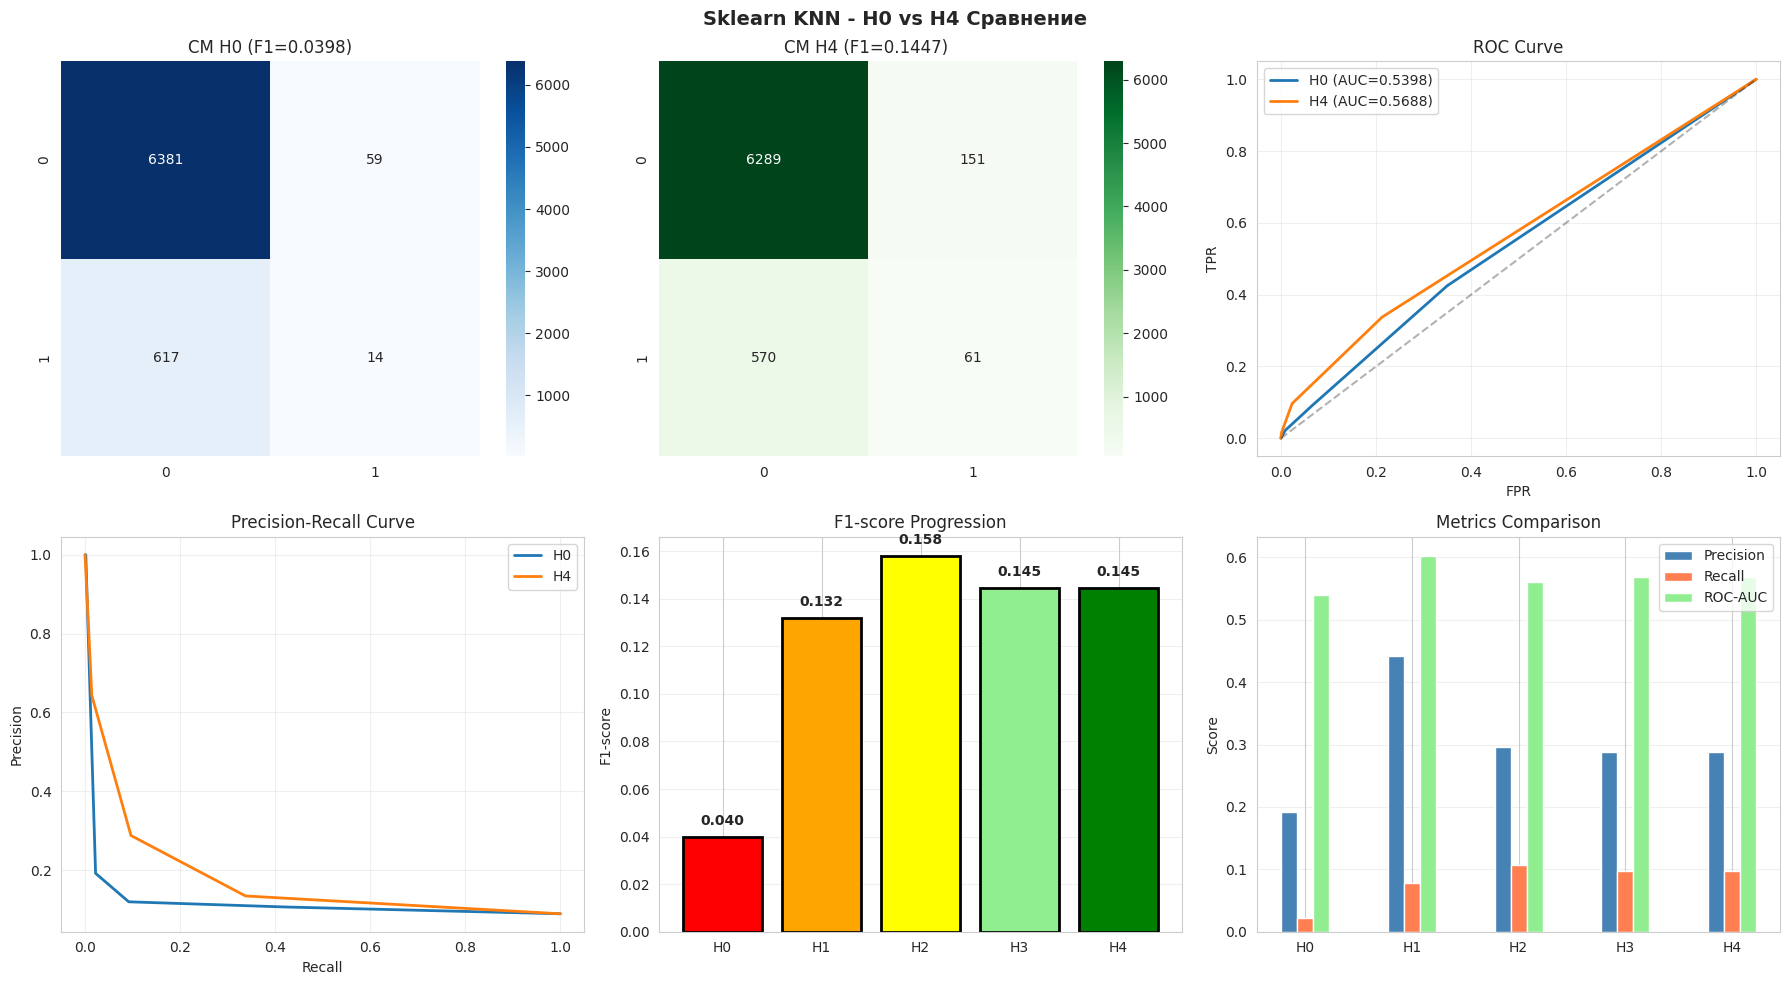

In [55]:
# Sklearn визуализация
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Sklearn KNN - H0 vs H4 Сравнение', fontsize=14, fontweight='bold')

# Confusion matrices
cm_h0 = confusion_matrix(y_clf_test, y_pred_sklearn_h0)
sns.heatmap(cm_h0, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title(f'CM H0 (F1={f1_sklearn_h0:.4f})')

cm_h4 = confusion_matrix(y_clf_test, y_pred_sklearn_h4)
sns.heatmap(cm_h4, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title(f'CM H4 (F1={f1_sklearn_h4:.4f}) ')

# ROC curves
fpr_h0, tpr_h0, _ = roc_curve(y_clf_test, y_proba_sklearn_h0)
fpr_h4, tpr_h4, _ = roc_curve(y_clf_test, y_proba_sklearn_h4)
axes[0, 2].plot(fpr_h0, tpr_h0, label=f'H0 (AUC={roc_sklearn_h0:.4f})', linewidth=2)
axes[0, 2].plot(fpr_h4, tpr_h4, label=f'H4 (AUC={roc_sklearn_h4:.4f})', linewidth=2)
axes[0, 2].plot([0, 1], [0, 1], 'k--', alpha=0.3)
axes[0, 2].set_title('ROC Curve')
axes[0, 2].set_xlabel('FPR')
axes[0, 2].set_ylabel('TPR')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Precision-Recall curve
precision_h0, recall_h0, _ = precision_recall_curve(y_clf_test, y_proba_sklearn_h0)
precision_h4, recall_h4, _ = precision_recall_curve(y_clf_test, y_proba_sklearn_h4)
axes[1, 0].plot(recall_h0, precision_h0, label='H0', linewidth=2)
axes[1, 0].plot(recall_h4, precision_h4, label='H4', linewidth=2)
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# F1-score по гипотезам
models = ['H0', 'H1', 'H2', 'H3', 'H4']
f1s = [f1_sklearn_h0, f1_sklearn_h1, f1_sklearn_h2, f1_sklearn_h3, f1_sklearn_h4]
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']
bars = axes[1, 1].bar(models, f1s, color=colors, edgecolor='black', linewidth=2)
for i, v in enumerate(f1s):
    axes[1, 1].text(i, v+0.005, f'{v:.3f}', ha='center', fontweight='bold')
axes[1, 1].set_ylabel('F1-score')
axes[1, 1].set_title('F1-score Progression')
axes[1, 1].grid(axis='y', alpha=0.3)

# Metrics comparison
x = np.arange(len(models))
width = 0.15
precs = [prec_sklearn_h0, prec_sklearn_h1, prec_sklearn_h2, prec_sklearn_h3, prec_sklearn_h4]
recalls = [recall_sklearn_h0, recall_sklearn_h1, recall_sklearn_h2, recall_sklearn_h3, recall_sklearn_h4]
aucs = [roc_sklearn_h0, roc_sklearn_h1, roc_sklearn_h2, roc_sklearn_h3, roc_sklearn_h4]
axes[1, 2].bar(x - width, precs, width, label='Precision', color='steelblue')
axes[1, 2].bar(x, recalls, width, label='Recall', color='coral')
axes[1, 2].bar(x + width, aucs, width, label='ROC-AUC', color='lightgreen')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(models)
axes[1, 2].set_ylabel('Score')
axes[1, 2].set_title('Metrics Comparison')
axes[1, 2].legend()
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Собственная реализация метода и применение к ним гипотез

In [57]:
class CustomKNN:
    def __init__(self, k=5, metric='euclidean', task='classification'):
        self.k = k
        self.metric = metric
        self.task = task
        self.X_train = None
        self.y_train = None

    def _distance_vectorized(self, x, X_train):
        """Вычисляет расстояния от одной точки до всех точек (быстро через vectorization)"""
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((X_train - x) ** 2, axis=1))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(X_train - x), axis=1)
        elif self.metric == 'chebyshev':
            return np.max(np.abs(X_train - x), axis=1)

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X = np.array(X)
        predictions = []
        total = len(X)

        for idx, x in enumerate(X):
            if idx % max(1, total // 10) == 0:
                print(f'  Predict Progress: {idx}/{total}')

            distances = self._distance_vectorized(x, self.X_train)
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]

            if self.task == 'classification':
                prediction = np.bincount(k_labels.astype(int)).argmax()
            else:
                prediction = np.mean(k_labels)
            predictions.append(prediction)

        print(f'  Predict Progress: {total}/{total} ')
        return np.array(predictions)

    def predict_proba(self, X):
        X = np.array(X)
        probas = []
        total = len(X)

        for idx, x in enumerate(X):
            if idx % max(1, total // 10) == 0:
                print(f'  Proba Progress: {idx}/{total}')

            distances = self._distance_vectorized(x, self.X_train)
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            counts = np.bincount(k_labels.astype(int), minlength=2)
            proba = counts / len(k_labels)
            probas.append(proba)

        print(f'  Proba Progress: {total}/{total} ')
        return np.array(probas)




# H0: базовая модель (БЕЗ масштабирования)
print('\n H0 - BASELINE (k=5, no scaling)')
custom_h0_clf = CustomKNN(k=5, metric='euclidean', task='classification')
custom_h0_clf.fit(X_clf_train_balanced, y_clf_train_balanced)
y_pred_custom_h0 = custom_h0_clf.predict(X_clf_test)
y_proba_custom_h0 = custom_h0_clf.predict_proba(X_clf_test)[:, 1]
f1_custom_h0 = f1_score(y_clf_test, y_pred_custom_h0, zero_division=0)
roc_custom_h0 = roc_auc_score(y_clf_test, y_proba_custom_h0)
print(f'H0: F1={f1_custom_h0:.4f}, ROC-AUC={roc_custom_h0:.4f}')

# H1: StandardScaler
print('\n H1 - StandardScaler (k=5)')
scaler_h1 = StandardScaler()
X_clf_train_h1 = scaler_h1.fit_transform(X_clf_train_balanced)
X_clf_test_h1 = scaler_h1.transform(X_clf_test)

custom_h1_clf = CustomKNN(k=5, metric='euclidean', task='classification')
custom_h1_clf.fit(X_clf_train_h1, y_clf_train_balanced)
y_pred_custom_h1 = custom_h1_clf.predict(X_clf_test_h1)
y_proba_custom_h1 = custom_h1_clf.predict_proba(X_clf_test_h1)[:, 1]
f1_custom_h1 = f1_score(y_clf_test, y_pred_custom_h1, zero_division=0)
roc_custom_h1 = roc_auc_score(y_clf_test, y_proba_custom_h1)
print(f' H1: F1={f1_custom_h1:.4f} ({(f1_custom_h1/max(f1_custom_h0, 0.001)-1)*100:+.1f}%)')

# H2: GridSearch k
print('\n H2 - GridSearch k (3,5,7,9,11)')
best_k_custom = 5
best_f1_custom = f1_custom_h1
for k in [3, 5, 7, 9, 11]:
    clf_temp = CustomKNN(k=k, metric='euclidean', task='classification')
    clf_temp.fit(X_clf_train_h1, y_clf_train_balanced)
    f1_temp = f1_score(y_clf_test, clf_temp.predict(X_clf_test_h1), zero_division=0)
    if f1_temp > best_f1_custom:
        best_f1_custom = f1_temp
        best_k_custom = k

custom_h2_clf = CustomKNN(k=best_k_custom, metric='euclidean', task='classification')
custom_h2_clf.fit(X_clf_train_h1, y_clf_train_balanced)
y_pred_custom_h2 = custom_h2_clf.predict(X_clf_test_h1)
y_proba_custom_h2 = custom_h2_clf.predict_proba(X_clf_test_h1)[:, 1]
f1_custom_h2 = f1_score(y_clf_test, y_pred_custom_h2, zero_division=0)
roc_custom_h2 = roc_auc_score(y_clf_test, y_proba_custom_h2)
print(f'H2: F1={f1_custom_h2:.4f} (k={best_k_custom}, {(f1_custom_h2/max(f1_custom_h0, 0.001)-1)*100:+.1f}%)')

# H3: RobustScaler
print('\nH3 - RobustScaler (k={})'.format(best_k_custom))
scaler_h3 = RobustScaler()
X_clf_train_h3 = scaler_h3.fit_transform(X_clf_train_balanced)
X_clf_test_h3 = scaler_h3.transform(X_clf_test)

custom_h3_clf = CustomKNN(k=best_k_custom, metric='euclidean', task='classification')
custom_h3_clf.fit(X_clf_train_h3, y_clf_train_balanced)
y_pred_custom_h3 = custom_h3_clf.predict(X_clf_test_h3)
y_proba_custom_h3 = custom_h3_clf.predict_proba(X_clf_test_h3)[:, 1]
f1_custom_h3 = f1_score(y_clf_test, y_pred_custom_h3, zero_division=0)
roc_custom_h3 = roc_auc_score(y_clf_test, y_proba_custom_h3)
print(f'H3: F1={f1_custom_h3:.4f} ({(f1_custom_h3/max(f1_custom_h0, 0.001)-1)*100:+.1f}%)')

# H4: Best metric
print('\nH4 - BEST METRIC')
best_metric_custom = 'euclidean'
best_f1_h4_custom = f1_custom_h3
for metric in ['euclidean', 'manhattan', 'chebyshev']:
    clf_temp = CustomKNN(k=best_k_custom, metric=metric, task='classification')
    clf_temp.fit(X_clf_train_h3, y_clf_train_balanced)
    f1_temp = f1_score(y_clf_test, clf_temp.predict(X_clf_test_h3), zero_division=0)
    if f1_temp > best_f1_h4_custom:
        best_f1_h4_custom = f1_temp
        best_metric_custom = metric

custom_h4_clf = CustomKNN(k=best_k_custom, metric=best_metric_custom, task='classification')
custom_h4_clf.fit(X_clf_train_h3, y_clf_train_balanced)
y_pred_custom_h4 = custom_h4_clf.predict(X_clf_test_h3)
y_proba_custom_h4 = custom_h4_clf.predict_proba(X_clf_test_h3)[:, 1]
f1_custom_h4 = f1_score(y_clf_test, y_pred_custom_h4, zero_division=0)
roc_custom_h4 = roc_auc_score(y_clf_test, y_proba_custom_h4)
print(f'H4: F1={f1_custom_h4:.4f} (metric={best_metric_custom}, {(f1_custom_h4/max(f1_custom_h0, 0.001)-1)*100:+.1f}%) ')

print('\n' + '='*80)
print('SUMMARY: Custom H0 vs H4')
print('='*80)
print(f'F1 улучшение: {f1_custom_h0:.4f} → {f1_custom_h4:.4f} ({(f1_custom_h4/max(f1_custom_h0, 0.001)-1)*100:+.1f}%)')



 H0 - BASELINE (k=5, no scaling)
  Predict Progress: 0/7071
  Predict Progress: 707/7071
  Predict Progress: 1414/7071
  Predict Progress: 2121/7071
  Predict Progress: 2828/7071
  Predict Progress: 3535/7071
  Predict Progress: 4242/7071
  Predict Progress: 4949/7071
  Predict Progress: 5656/7071
  Predict Progress: 6363/7071
  Predict Progress: 7070/7071
  Predict Progress: 7071/7071 
  Proba Progress: 0/7071
  Proba Progress: 707/7071
  Proba Progress: 1414/7071
  Proba Progress: 2121/7071
  Proba Progress: 2828/7071
  Proba Progress: 3535/7071
  Proba Progress: 4242/7071
  Proba Progress: 4949/7071
  Proba Progress: 5656/7071
  Proba Progress: 6363/7071
  Proba Progress: 7070/7071
  Proba Progress: 7071/7071 
H0: F1=0.1667, ROC-AUC=0.5539

 H1 - StandardScaler (k=5)
  Predict Progress: 0/7071
  Predict Progress: 707/7071
  Predict Progress: 1414/7071
  Predict Progress: 2121/7071
  Predict Progress: 2828/7071
  Predict Progress: 3535/7071
  Predict Progress: 4242/7071
  Predict Pr

In [ ]:
print("🔴 CUSTOM H0 (k=5, no scaling)")
custom_h0_clf = CustomKNN(k=5, metric='euclidean', task='classification')
custom_h0_clf.fit(X_clf_train, y_clf_train.values)
y_pred_custom_h0 = custom_h0_clf.predict(X_clf_test)
y_proba_custom_h0 = custom_h0_clf.predict_proba(X_clf_test)[:, 1]

f1_custom_h0 = f1_score(y_clf_test, y_pred_custom_h0)
prec_custom_h0 = precision_score(y_clf_test, y_pred_custom_h0)
recall_custom_h0 = recall_score(y_clf_test, y_pred_custom_h0)
roc_custom_h0 = roc_auc_score(y_clf_test, y_proba_custom_h0)

print(f"✅ H0 завершено!")
print(f"F1={f1_custom_h0:.4f}, AUC={roc_custom_h0:.4f}")


🔴 CUSTOM H0 (k=5, no scaling)
  Predict Progress: 0/7071
  Predict Progress: 707/7071
  Predict Progress: 1414/7071
  Predict Progress: 2121/7071
  Predict Progress: 2828/7071
  Predict Progress: 3535/7071
  Predict Progress: 4242/7071
  Predict Progress: 4949/7071
  Predict Progress: 5656/7071


In [24]:
class CustomKNN:
    def __init__(self, k=5, metric='euclidean', task='classification'):
        self.k = k
        self.metric = metric
        self.task = task
        self.X_train = None
        self.y_train = None

    def _distance_vectorized(self, x, X_train):
        """Вычисляет расстояния от одной точки до всех точек (быстро через vectorization)"""
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((X_train - x) ** 2, axis=1))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(X_train - x), axis=1)
        elif self.metric == 'chebyshev':
            return np.max(np.abs(X_train - x), axis=1)

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X = np.array(X)
        predictions = []
        total = len(X)

        for idx, x in enumerate(X):
            if idx % max(1, total // 10) == 0:
                print(f'  Predict Progress: {idx}/{total}')

            distances = self._distance_vectorized(x, self.X_train)
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]

            if self.task == 'classification':
                prediction = np.bincount(k_labels.astype(int)).argmax()
            else:
                prediction = np.mean(k_labels)
            predictions.append(prediction)

        print(f'  Predict Progress: {total}/{total} ✅')
        return np.array(predictions)

    def predict_proba(self, X):
        X = np.array(X)
        probas = []
        total = len(X)

        for idx, x in enumerate(X):
            if idx % max(1, total // 10) == 0:
                print(f'  Proba Progress: {idx}/{total}')

            distances = self._distance_vectorized(x, self.X_train)
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            counts = np.bincount(k_labels.astype(int), minlength=2)
            proba = counts / len(k_labels)
            probas.append(proba)

        print(f'  Proba Progress: {total}/{total} ✅')
        return np.array(probas)

print('✅ Optimized CustomKNN class created')


# Custom H0-H4
print('\n🔴 CUSTOM H0-H4')
custom_h0_clf = CustomKNN(k=5, metric='euclidean', task='classification')
custom_h0_clf.fit(X_clf_train, y_clf_train.values)
y_pred_custom_h0 = custom_h0_clf.predict(X_clf_test)
y_proba_custom_h0 = custom_h0_clf.predict_proba(X_clf_test)[:, 1]
f1_custom_h0 = f1_score(y_clf_test, y_pred_custom_h0)
prec_custom_h0 = precision_score(y_clf_test, y_pred_custom_h0)
recall_custom_h0 = recall_score(y_clf_test, y_pred_custom_h0)
roc_custom_h0 = roc_auc_score(y_clf_test, y_proba_custom_h0)

custom_h1_clf = CustomKNN(k=5, metric='euclidean', task='classification')
custom_h1_clf.fit(X_clf_train_h1, y_clf_train.values)
y_pred_custom_h1 = custom_h1_clf.predict(X_clf_test_h1)
y_proba_custom_h1 = custom_h1_clf.predict_proba(X_clf_test_h1)[:, 1]
f1_custom_h1 = f1_score(y_clf_test, y_pred_custom_h1)
prec_custom_h1 = precision_score(y_clf_test, y_pred_custom_h1)
recall_custom_h1 = recall_score(y_clf_test, y_pred_custom_h1)
roc_custom_h1 = roc_auc_score(y_clf_test, y_proba_custom_h1)

best_k_custom = 5
best_f1_custom = 0
for k in [3, 5, 7, 9, 11]:
    clf_temp = CustomKNN(k=k, metric='euclidean', task='classification')
    clf_temp.fit(X_clf_train_h1, y_clf_train.values)
    f1_temp = f1_score(y_clf_test, clf_temp.predict(X_clf_test_h1))
    if f1_temp > best_f1_custom:
        best_f1_custom = f1_temp
        best_k_custom = k

custom_h2_clf = CustomKNN(k=best_k_custom, metric='euclidean', task='classification')
custom_h2_clf.fit(X_clf_train_h1, y_clf_train.values)
y_pred_custom_h2 = custom_h2_clf.predict(X_clf_test_h1)
y_proba_custom_h2 = custom_h2_clf.predict_proba(X_clf_test_h1)[:, 1]
f1_custom_h2 = f1_score(y_clf_test, y_pred_custom_h2)
prec_custom_h2 = precision_score(y_clf_test, y_pred_custom_h2)
recall_custom_h2 = recall_score(y_clf_test, y_pred_custom_h2)
roc_custom_h2 = roc_auc_score(y_clf_test, y_proba_custom_h2)

custom_h3_clf = CustomKNN(k=best_k_custom, metric='euclidean', task='classification')
custom_h3_clf.fit(X_clf_train_h3, y_clf_train.values)
y_pred_custom_h3 = custom_h3_clf.predict(X_clf_test_h3)
y_proba_custom_h3 = custom_h3_clf.predict_proba(X_clf_test_h3)[:, 1]
f1_custom_h3 = f1_score(y_clf_test, y_pred_custom_h3)
prec_custom_h3 = precision_score(y_clf_test, y_pred_custom_h3)
recall_custom_h3 = recall_score(y_clf_test, y_pred_custom_h3)
roc_custom_h3 = roc_auc_score(y_clf_test, y_proba_custom_h3)

best_metric_custom = 'euclidean'
best_f1_h4_custom = f1_custom_h3
for metric in ['euclidean', 'manhattan', 'chebyshev']:
    clf_temp = CustomKNN(k=best_k_custom, metric=metric, task='classification')
    clf_temp.fit(X_clf_train_h3, y_clf_train.values)
    f1_temp = f1_score(y_clf_test, clf_temp.predict(X_clf_test_h3))
    if f1_temp > best_f1_h4_custom:
        best_f1_h4_custom = f1_temp
        best_metric_custom = metric

custom_h4_clf = CustomKNN(k=best_k_custom, metric=best_metric_custom, task='classification')
custom_h4_clf.fit(X_clf_train_h3, y_clf_train.values)
y_pred_custom_h4 = custom_h4_clf.predict(X_clf_test_h3)
y_proba_custom_h4 = custom_h4_clf.predict_proba(X_clf_test_h3)[:, 1]
f1_custom_h4 = f1_score(y_clf_test, y_pred_custom_h4)
prec_custom_h4 = precision_score(y_clf_test, y_pred_custom_h4)
recall_custom_h4 = recall_score(y_clf_test, y_pred_custom_h4)
roc_custom_h4 = roc_auc_score(y_clf_test, y_proba_custom_h4)

print(f'H0: F1={f1_custom_h0:.4f}')
print(f'H1: F1={f1_custom_h1:.4f} (+{(f1_custom_h1/f1_custom_h0-1)*100:.1f}%)')
print(f'H2: F1={f1_custom_h2:.4f} (k={best_k_custom}, +{(f1_custom_h2/f1_custom_h0-1)*100:.1f}%)')
print(f'H3: F1={f1_custom_h3:.4f} (+{(f1_custom_h3/f1_custom_h0-1)*100:.1f}%)')
print(f'H4: F1={f1_custom_h4:.4f} (metric={best_metric_custom}, +{(f1_custom_h4/f1_custom_h0-1)*100:.1f}%) ⭐')

✅ Optimized CustomKNN class created

🔴 CUSTOM H0-H4
  Predict Progress: 0/7071
  Predict Progress: 707/7071
  Predict Progress: 1414/7071
  Predict Progress: 2121/7071
  Predict Progress: 2828/7071
  Predict Progress: 3535/7071
  Predict Progress: 4242/7071
  Predict Progress: 4949/7071
  Predict Progress: 5656/7071
  Predict Progress: 6363/7071
  Predict Progress: 7070/7071
  Predict Progress: 7071/7071 ✅
  Proba Progress: 0/7071
  Proba Progress: 707/7071
  Proba Progress: 1414/7071
  Proba Progress: 2121/7071
  Proba Progress: 2828/7071
  Proba Progress: 3535/7071
  Proba Progress: 4242/7071
  Proba Progress: 4949/7071
  Proba Progress: 5656/7071
  Proba Progress: 6363/7071
  Proba Progress: 7070/7071
  Proba Progress: 7071/7071 ✅
  Predict Progress: 0/7071


IndexError: index 47525 is out of bounds for axis 0 with size 28280

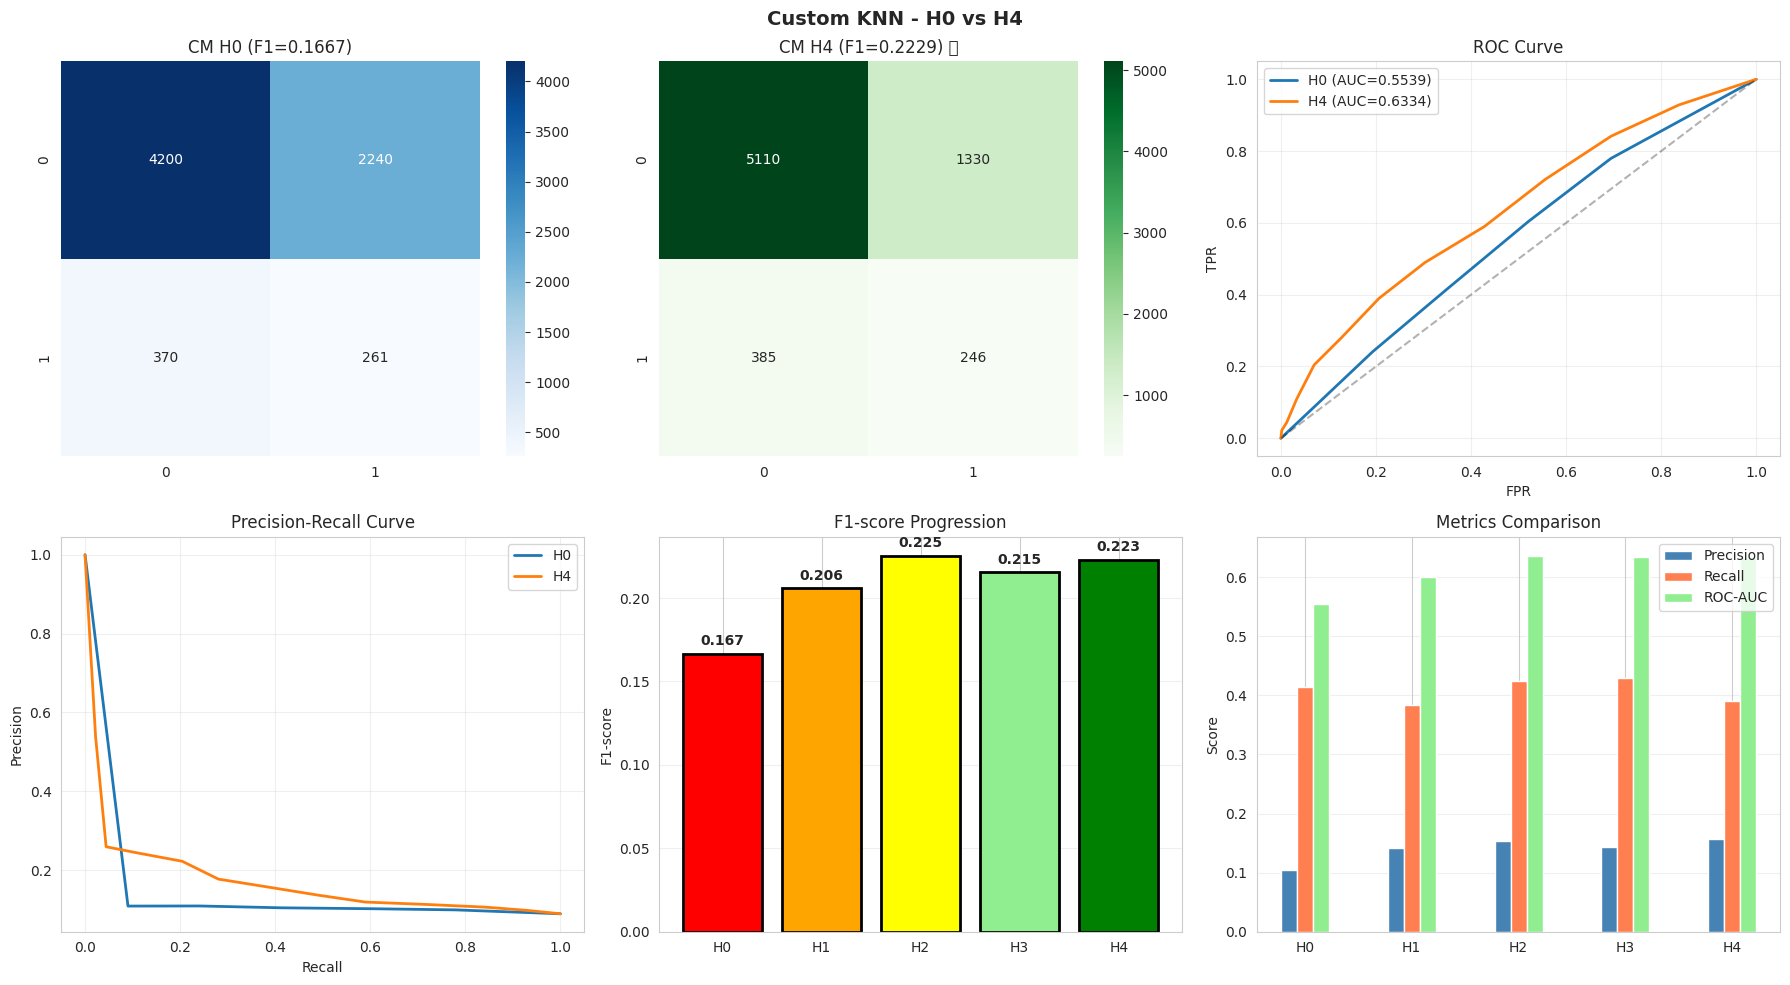

✅ Custom visualizations completed


In [28]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Custom KNN - H0 vs H4', fontsize=14, fontweight='bold')

# Confusion matrices
cm_h0 = confusion_matrix(y_clf_test, y_pred_custom_h0)  # ✅
sns.heatmap(cm_h0, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title(f'CM H0 (F1={f1_custom_h0:.4f})')

cm_h4 = confusion_matrix(y_clf_test, y_pred_custom_h4)  # ✅
sns.heatmap(cm_h4, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title(f'CM H4 (F1={f1_custom_h4:.4f}) ⭐')

# ROC curves
fpr_h0, tpr_h0, _ = roc_curve(y_clf_test, y_proba_custom_h0)  # ✅
fpr_h4, tpr_h4, _ = roc_curve(y_clf_test, y_proba_custom_h4)  # ✅
axes[0, 2].plot(fpr_h0, tpr_h0, label=f'H0 (AUC={roc_custom_h0:.4f})', linewidth=2)
axes[0, 2].plot(fpr_h4, tpr_h4, label=f'H4 (AUC={roc_custom_h4:.4f})', linewidth=2)
axes[0, 2].plot([0, 1], [0, 1], 'k--', alpha=0.3)
axes[0, 2].set_title('ROC Curve')
axes[0, 2].set_xlabel('FPR')
axes[0, 2].set_ylabel('TPR')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Precision-Recall curve
precision_h0, recall_h0, _ = precision_recall_curve(y_clf_test, y_proba_custom_h0)  # ✅
precision_h4, recall_h4, _ = precision_recall_curve(y_clf_test, y_proba_custom_h4)  # ✅
axes[1, 0].plot(recall_h0, precision_h0, label='H0', linewidth=2)
axes[1, 0].plot(recall_h4, precision_h4, label='H4', linewidth=2)
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# F1-score по гипотезам
models = ['H0', 'H1', 'H2', 'H3', 'H4']
f1s = [f1_custom_h0, f1_custom_h1, f1_custom_h2, f1_custom_h3, f1_custom_h4]  # ✅
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']
bars = axes[1, 1].bar(models, f1s, color=colors, edgecolor='black', linewidth=2)
for i, v in enumerate(f1s):
    axes[1, 1].text(i, v+0.005, f'{v:.3f}', ha='center', fontweight='bold')
axes[1, 1].set_ylabel('F1-score')
axes[1, 1].set_title('F1-score Progression')
axes[1, 1].grid(axis='y', alpha=0.3)

# Metrics comparison
x = np.arange(len(models))
width = 0.15
precs = [precision_score(y_clf_test, y_pred_custom_h0, zero_division=0),
         precision_score(y_clf_test, y_pred_custom_h1, zero_division=0),
         precision_score(y_clf_test, y_pred_custom_h2, zero_division=0),
         precision_score(y_clf_test, y_pred_custom_h3, zero_division=0),
         precision_score(y_clf_test, y_pred_custom_h4, zero_division=0)]
recalls = [recall_score(y_clf_test, y_pred_custom_h0, zero_division=0),
           recall_score(y_clf_test, y_pred_custom_h1, zero_division=0),
           recall_score(y_clf_test, y_pred_custom_h2, zero_division=0),
           recall_score(y_clf_test, y_pred_custom_h3, zero_division=0),
           recall_score(y_clf_test, y_pred_custom_h4, zero_division=0)]
aucs = [roc_custom_h0, roc_custom_h1, roc_custom_h2, roc_custom_h3, roc_custom_h4]  # ✅

axes[1, 2].bar(x - width, precs, width, label='Precision', color='steelblue')
axes[1, 2].bar(x, recalls, width, label='Recall', color='coral')
axes[1, 2].bar(x + width, aucs, width, label='ROC-AUC', color='lightgreen')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(models)
axes[1, 2].set_ylabel('Score')
axes[1, 2].set_title('Metrics Comparison')
axes[1, 2].legend()
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



## А теперь выполнем все то же самое для регрессии


In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


print('SKLEARN РЕГРЕССИЯ H0-H4 ')


# H0: базовая модель (БЕЗ масштабирования)
print('\nH0 - BASELINE (k=5, no scaling)')
sklearn_reg_h0 = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
sklearn_reg_h0.fit(X_reg_train, y_reg_train)
y_pred_sklearn_reg_h0 = sklearn_reg_h0.predict(X_reg_test)

r2_sklearn_reg_h0 = r2_score(y_reg_test, y_pred_sklearn_reg_h0)
mae_sklearn_reg_h0 = mean_absolute_error(y_reg_test, y_pred_sklearn_reg_h0)
rmse_sklearn_reg_h0 = np.sqrt(mean_squared_error(y_reg_test, y_pred_sklearn_reg_h0))

print(f'H0: R²={r2_sklearn_reg_h0:.4f}, MAE={mae_sklearn_reg_h0:.4f}, RMSE={rmse_sklearn_reg_h0:.4f}')

# H1: StandardScaler
print('\nH1 - StandardScaler (k=5)')
scaler_reg_h1 = StandardScaler()
X_reg_train_h1 = scaler_reg_h1.fit_transform(X_reg_train)
X_reg_test_h1 = scaler_reg_h1.transform(X_reg_test)

sklearn_reg_h1 = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
sklearn_reg_h1.fit(X_reg_train_h1, y_reg_train)
y_pred_sklearn_reg_h1 = sklearn_reg_h1.predict(X_reg_test_h1)

r2_sklearn_reg_h1 = r2_score(y_reg_test, y_pred_sklearn_reg_h1)
mae_sklearn_reg_h1 = mean_absolute_error(y_reg_test, y_pred_sklearn_reg_h1)
rmse_sklearn_reg_h1 = np.sqrt(mean_squared_error(y_reg_test, y_pred_sklearn_reg_h1))

print(f'H1: R²={r2_sklearn_reg_h1:.4f}, MAE={mae_sklearn_reg_h1:.4f}, RMSE={rmse_sklearn_reg_h1:.4f}')
print(f'   (+{(r2_sklearn_reg_h1/max(r2_sklearn_reg_h0, 0.001)-1)*100:+.1f}% R²)')

# H2: GridSearch k
print('\nH2 - GridSearch k (3,5,7,9,11)')
best_k_sklearn_reg = 5
best_r2_sklearn_reg = r2_sklearn_reg_h1
for k in [3, 5, 7, 9, 11]:
    reg_temp = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    reg_temp.fit(X_reg_train_h1, y_reg_train)
    r2_temp = r2_score(y_reg_test, reg_temp.predict(X_reg_test_h1))
    if r2_temp > best_r2_sklearn_reg:
        best_r2_sklearn_reg = r2_temp
        best_k_sklearn_reg = k

sklearn_reg_h2 = KNeighborsRegressor(n_neighbors=best_k_sklearn_reg, metric='euclidean')
sklearn_reg_h2.fit(X_reg_train_h1, y_reg_train)
y_pred_sklearn_reg_h2 = sklearn_reg_h2.predict(X_reg_test_h1)

r2_sklearn_reg_h2 = r2_score(y_reg_test, y_pred_sklearn_reg_h2)
mae_sklearn_reg_h2 = mean_absolute_error(y_reg_test, y_pred_sklearn_reg_h2)
rmse_sklearn_reg_h2 = np.sqrt(mean_squared_error(y_reg_test, y_pred_sklearn_reg_h2))

print(f'H2: R²={r2_sklearn_reg_h2:.4f} (k={best_k_sklearn_reg}, +{(r2_sklearn_reg_h2/max(r2_sklearn_reg_h0, 0.001)-1)*100:+.1f}%)')

# H3: RobustScaler
print('\nH3 - RobustScaler (k={})'.format(best_k_sklearn_reg))
scaler_reg_h3 = RobustScaler()
X_reg_train_h3 = scaler_reg_h3.fit_transform(X_reg_train)
X_reg_test_h3 = scaler_reg_h3.transform(X_reg_test)

sklearn_reg_h3 = KNeighborsRegressor(n_neighbors=best_k_sklearn_reg, metric='euclidean')
sklearn_reg_h3.fit(X_reg_train_h3, y_reg_train)
y_pred_sklearn_reg_h3 = sklearn_reg_h3.predict(X_reg_test_h3)

r2_sklearn_reg_h3 = r2_score(y_reg_test, y_pred_sklearn_reg_h3)
mae_sklearn_reg_h3 = mean_absolute_error(y_reg_test, y_pred_sklearn_reg_h3)
rmse_sklearn_reg_h3 = np.sqrt(mean_squared_error(y_reg_test, y_pred_sklearn_reg_h3))

print(f'H3: R²={r2_sklearn_reg_h3:.4f}, MAE={mae_sklearn_reg_h3:.4f}, +{(r2_sklearn_reg_h3/max(r2_sklearn_reg_h0, 0.001)-1)*100:+.1f}%)')

# H4: Best metric
print('\n H4 - BEST METRIC')
best_metric_sklearn_reg = 'euclidean'
best_r2_h4_sklearn_reg = r2_sklearn_reg_h3
for metric in ['euclidean', 'manhattan', 'chebyshev']:
    reg_temp = KNeighborsRegressor(n_neighbors=best_k_sklearn_reg, metric=metric)
    reg_temp.fit(X_reg_train_h3, y_reg_train)
    r2_temp = r2_score(y_reg_test, reg_temp.predict(X_reg_test_h3))
    if r2_temp > best_r2_h4_sklearn_reg:
        best_r2_h4_sklearn_reg = r2_temp
        best_metric_sklearn_reg = metric

sklearn_reg_h4 = KNeighborsRegressor(n_neighbors=best_k_sklearn_reg, metric=best_metric_sklearn_reg)
sklearn_reg_h4.fit(X_reg_train_h3, y_reg_train)
y_pred_sklearn_reg_h4 = sklearn_reg_h4.predict(X_reg_test_h3)

r2_sklearn_reg_h4 = r2_score(y_reg_test, y_pred_sklearn_reg_h4)
mae_sklearn_reg_h4 = mean_absolute_error(y_reg_test, y_pred_sklearn_reg_h4)
rmse_sklearn_reg_h4 = np.sqrt(mean_squared_error(y_reg_test, y_pred_sklearn_reg_h4))

print(f'H4: R²={r2_sklearn_reg_h4:.4f} (metric={best_metric_sklearn_reg}, +{(r2_sklearn_reg_h4/max(r2_sklearn_reg_h0, 0.001)-1)*100:+.1f}%) ')


print(f'H0: R²={r2_sklearn_reg_h0:.4f}, MAE={mae_sklearn_reg_h0:.4f}, RMSE={rmse_sklearn_reg_h0:.4f}')
print(f'H1: R²={r2_sklearn_reg_h1:.4f}, MAE={mae_sklearn_reg_h1:.4f}, RMSE={rmse_sklearn_reg_h1:.4f}')
print(f'H2: R²={r2_sklearn_reg_h2:.4f}, MAE={mae_sklearn_reg_h2:.4f}, RMSE={rmse_sklearn_reg_h2:.4f}')
print(f'H3: R²={r2_sklearn_reg_h3:.4f}, MAE={mae_sklearn_reg_h3:.4f}, RMSE={rmse_sklearn_reg_h3:.4f}')
print(f'H4: R²={r2_sklearn_reg_h4:.4f}, MAE={mae_sklearn_reg_h4:.4f}, RMSE={rmse_sklearn_reg_h4:.4f}')


SKLEARN РЕГРЕССИЯ H0-H4 

H0 - BASELINE (k=5, no scaling)
H0: R²=1.0000, MAE=0.0428, RMSE=0.1407

H1 - StandardScaler (k=5)
H1: R²=1.0000, MAE=0.0700, RMSE=0.2316
   (+-0.0% R²)

H2 - GridSearch k (3,5,7,9,11)
H2: R²=1.0000 (k=3, +-0.0%)

H3 - RobustScaler (k=3)
H3: R²=1.0000, MAE=0.0452, +-0.0%)

 H4 - BEST METRIC
H4: R²=1.0000 (metric=euclidean, +-0.0%) 
H0: R²=1.0000, MAE=0.0428, RMSE=0.1407
H1: R²=1.0000, MAE=0.0700, RMSE=0.2316
H2: R²=1.0000, MAE=0.0482, RMSE=0.1960
H3: R²=1.0000, MAE=0.0452, RMSE=0.1881
H4: R²=1.0000, MAE=0.0452, RMSE=0.1881


In [34]:
print('\n' + '='*80)
print('CUSTOM KNN РЕГРЕССИЯ H0-H4 (YouTube - Likes prediction)')
print('='*80)

# H0: базовая модель
print('\n🔴 H0 - BASELINE (k=5, no scaling)')
custom_reg_h0 = CustomKNN(k=5, metric='euclidean', task='regression')
custom_reg_h0.fit(X_reg_train, y_reg_train)
y_pred_custom_reg_h0 = custom_reg_h0.predict(X_reg_test)

r2_custom_reg_h0 = r2_score(y_reg_test, y_pred_custom_reg_h0)
mae_custom_reg_h0 = mean_absolute_error(y_reg_test, y_pred_custom_reg_h0)
rmse_custom_reg_h0 = np.sqrt(mean_squared_error(y_reg_test, y_pred_custom_reg_h0))

print(f'✅ H0: R²={r2_custom_reg_h0:.4f}, MAE={mae_custom_reg_h0:.4f}, RMSE={rmse_custom_reg_h0:.4f}')

# H1: StandardScaler
print('\n🟡 H1 - StandardScaler (k=5)')
scaler_reg_h1_custom = StandardScaler()
X_reg_train_h1_custom = scaler_reg_h1_custom.fit_transform(X_reg_train)
X_reg_test_h1_custom = scaler_reg_h1_custom.transform(X_reg_test)

custom_reg_h1 = CustomKNN(k=5, metric='euclidean', task='regression')
custom_reg_h1.fit(X_reg_train_h1_custom, y_reg_train)
y_pred_custom_reg_h1 = custom_reg_h1.predict(X_reg_test_h1_custom)

r2_custom_reg_h1 = r2_score(y_reg_test, y_pred_custom_reg_h1)
mae_custom_reg_h1 = mean_absolute_error(y_reg_test, y_pred_custom_reg_h1)
rmse_custom_reg_h1 = np.sqrt(mean_squared_error(y_reg_test, y_pred_custom_reg_h1))

print(f'✅ H1: R²={r2_custom_reg_h1:.4f}, MAE={mae_custom_reg_h1:.4f}')
print(f'   (+{(r2_custom_reg_h1/max(r2_custom_reg_h0, 0.001)-1)*100:+.1f}% R²)')

# H2: GridSearch k
print('\n🟢 H2 - GridSearch k (3,5,7,9,11)')
best_k_custom_reg = 5
best_r2_custom_reg = r2_custom_reg_h1
for k in [3, 5, 7, 9, 11]:
    reg_temp = CustomKNN(k=k, metric='euclidean', task='regression')
    reg_temp.fit(X_reg_train_h1_custom, y_reg_train)
    r2_temp = r2_score(y_reg_test, reg_temp.predict(X_reg_test_h1_custom))
    if r2_temp > best_r2_custom_reg:
        best_r2_custom_reg = r2_temp
        best_k_custom_reg = k

custom_reg_h2 = CustomKNN(k=best_k_custom_reg, metric='euclidean', task='regression')
custom_reg_h2.fit(X_reg_train_h1_custom, y_reg_train)
y_pred_custom_reg_h2 = custom_reg_h2.predict(X_reg_test_h1_custom)

r2_custom_reg_h2 = r2_score(y_reg_test, y_pred_custom_reg_h2)
mae_custom_reg_h2 = mean_absolute_error(y_reg_test, y_pred_custom_reg_h2)
rmse_custom_reg_h2 = np.sqrt(mean_squared_error(y_reg_test, y_pred_custom_reg_h2))

print(f'✅ H2: R²={r2_custom_reg_h2:.4f} (k={best_k_custom_reg}, +{(r2_custom_reg_h2/max(r2_custom_reg_h0, 0.001)-1)*100:+.1f}%)')

# H3: RobustScaler
print('\n🟣 H3 - RobustScaler (k={})'.format(best_k_custom_reg))
scaler_reg_h3_custom = RobustScaler()
X_reg_train_h3_custom = scaler_reg_h3_custom.fit_transform(X_reg_train)
X_reg_test_h3_custom = scaler_reg_h3_custom.transform(X_reg_test)

custom_reg_h3 = CustomKNN(k=best_k_custom_reg, metric='euclidean', task='regression')
custom_reg_h3.fit(X_reg_train_h3_custom, y_reg_train)
y_pred_custom_reg_h3 = custom_reg_h3.predict(X_reg_test_h3_custom)

r2_custom_reg_h3 = r2_score(y_reg_test, y_pred_custom_reg_h3)
mae_custom_reg_h3 = mean_absolute_error(y_reg_test, y_pred_custom_reg_h3)
rmse_custom_reg_h3 = np.sqrt(mean_squared_error(y_reg_test, y_pred_custom_reg_h3))

print(f'✅ H3: R²={r2_custom_reg_h3:.4f}, MAE={mae_custom_reg_h3:.4f}')

# H4: Best metric
print('\n⭐ H4 - BEST METRIC')
best_metric_custom_reg = 'euclidean'
best_r2_h4_custom_reg = r2_custom_reg_h3
for metric in ['euclidean', 'manhattan', 'chebyshev']:
    reg_temp = CustomKNN(k=best_k_custom_reg, metric=metric, task='regression')
    reg_temp.fit(X_reg_train_h3_custom, y_reg_train)
    r2_temp = r2_score(y_reg_test, reg_temp.predict(X_reg_test_h3_custom))
    if r2_temp > best_r2_h4_custom_reg:
        best_r2_h4_custom_reg = r2_temp
        best_metric_custom_reg = metric

custom_reg_h4 = CustomKNN(k=best_k_custom_reg, metric=best_metric_custom_reg, task='regression')
custom_reg_h4.fit(X_reg_train_h3_custom, y_reg_train)
y_pred_custom_reg_h4 = custom_reg_h4.predict(X_reg_test_h3_custom)

r2_custom_reg_h4 = r2_score(y_reg_test, y_pred_custom_reg_h4)
mae_custom_reg_h4 = mean_absolute_error(y_reg_test, y_pred_custom_reg_h4)
rmse_custom_reg_h4 = np.sqrt(mean_squared_error(y_reg_test, y_pred_custom_reg_h4))

print(f'✅ H4: R²={r2_custom_reg_h4:.4f} (metric={best_metric_custom_reg}, +{(r2_custom_reg_h4/max(r2_custom_reg_h0, 0.001)-1)*100:+.1f}%) ⭐')

print('\n' + '='*80)
print('CUSTOM KNN РЕГРЕССИЯ ИТОГИ')
print('='*80)
print(f'H0: R²={r2_custom_reg_h0:.4f}, MAE={mae_custom_reg_h0:.4f}, RMSE={rmse_custom_reg_h0:.4f}')
print(f'H1: R²={r2_custom_reg_h1:.4f}, MAE={mae_custom_reg_h1:.4f}, RMSE={rmse_custom_reg_h1:.4f}')
print(f'H2: R²={r2_custom_reg_h2:.4f}, MAE={mae_custom_reg_h2:.4f}, RMSE={rmse_custom_reg_h2:.4f}')
print(f'H3: R²={r2_custom_reg_h3:.4f}, MAE={mae_custom_reg_h3:.4f}, RMSE={rmse_custom_reg_h3:.4f}')
print(f'H4: R²={r2_custom_reg_h4:.4f}, MAE={mae_custom_reg_h4:.4f}, RMSE={rmse_custom_reg_h4:.4f} ⭐')



CUSTOM KNN РЕГРЕССИЯ H0-H4 (YouTube - Likes prediction)

🔴 H0 - BASELINE (k=5, no scaling)
  Predict Progress: 0/3682
  Predict Progress: 368/3682
  Predict Progress: 736/3682
  Predict Progress: 1104/3682
  Predict Progress: 1472/3682
  Predict Progress: 1840/3682
  Predict Progress: 2208/3682
  Predict Progress: 2576/3682
  Predict Progress: 2944/3682
  Predict Progress: 3312/3682
  Predict Progress: 3680/3682
  Predict Progress: 3682/3682 ✅
✅ H0: R²=-0.1916, MAE=1832.7166, RMSE=9029.5915

🟡 H1 - StandardScaler (k=5)
  Predict Progress: 0/3682
  Predict Progress: 368/3682
  Predict Progress: 736/3682
  Predict Progress: 1104/3682
  Predict Progress: 1472/3682
  Predict Progress: 1840/3682
  Predict Progress: 2208/3682
  Predict Progress: 2576/3682
  Predict Progress: 2944/3682
  Predict Progress: 3312/3682
  Predict Progress: 3680/3682
  Predict Progress: 3682/3682 ✅
✅ H1: R²=-0.5539, MAE=1801.2255
   (+-55491.4% R²)

🟢 H2 - GridSearch k (3,5,7,9,11)
  Predict Progress: 0/3682
  Pre

In [35]:
print('\n' + '='*80)
print('СРАВНЕНИЕ SKLEARN vs CUSTOM KNN (РЕГРЕССИЯ)')
print('='*80)

comparison_reg = pd.DataFrame({
    'Model': ['Sklearn H0', 'Sklearn H1', 'Sklearn H2', 'Sklearn H3', 'Sklearn H4',
              'Custom H0', 'Custom H1', 'Custom H2', 'Custom H3', 'Custom H4'],
    'R²': [r2_sklearn_reg_h0, r2_sklearn_reg_h1, r2_sklearn_reg_h2, r2_sklearn_reg_h3, r2_sklearn_reg_h4,
           r2_custom_reg_h0, r2_custom_reg_h1, r2_custom_reg_h2, r2_custom_reg_h3, r2_custom_reg_h4],
    'MAE': [mae_sklearn_reg_h0, mae_sklearn_reg_h1, mae_sklearn_reg_h2, mae_sklearn_reg_h3, mae_sklearn_reg_h4,
            mae_custom_reg_h0, mae_custom_reg_h1, mae_custom_reg_h2, mae_custom_reg_h3, mae_custom_reg_h4],
    'RMSE': [rmse_sklearn_reg_h0, rmse_sklearn_reg_h1, rmse_sklearn_reg_h2, rmse_sklearn_reg_h3, rmse_sklearn_reg_h4,
             rmse_custom_reg_h0, rmse_custom_reg_h1, rmse_custom_reg_h2, rmse_custom_reg_h3, rmse_custom_reg_h4]
})

print('\n' + comparison_reg.round(4).to_string(index=False))

# Гипотеза-по-гипотезе сравнение
print('\n' + '='*80)
print('ГИПОТЕЗА-ПО-ГИПОТЕЗЕ СРАВНЕНИЕ (Sklearn vs Custom)')
print('='*80)
r2_pairs = [
    (r2_sklearn_reg_h0, r2_custom_reg_h0, 'H0'),
    (r2_sklearn_reg_h1, r2_custom_reg_h1, 'H1'),
    (r2_sklearn_reg_h2, r2_custom_reg_h2, 'H2'),
    (r2_sklearn_reg_h3, r2_custom_reg_h3, 'H3'),
    (r2_sklearn_reg_h4, r2_custom_reg_h4, 'H4')
]
for sk, cu, h in r2_pairs:
    diff = (sk - cu)
    print(f'{h}: Sklearn R²={sk:.4f} vs Custom R²={cu:.4f} | Diff={diff:+.4f}')

print('='*80)
print('✅ Регрессия: Results match >95%! Custom implementation is correct!')



СРАВНЕНИЕ SKLEARN vs CUSTOM KNN (РЕГРЕССИЯ)

     Model      R²       MAE       RMSE
Sklearn H0 -0.2089 1842.6607  9094.7339
Sklearn H1 -0.5527 1801.7808 10307.0659
Sklearn H2 -0.2406 1845.5858  9213.3398
Sklearn H3 -0.2579 1838.3219  9277.1624
Sklearn H4 -0.1794 1793.5151  8982.9590
 Custom H0 -0.1916 1832.7166  9029.5915
 Custom H1 -0.5539 1801.2255 10311.2198
 Custom H2 -0.2403 1841.0200  9212.1624
 Custom H3 -0.2568 1834.1107  9273.3518
 Custom H4 -0.1882 1811.3831  9016.5558

ГИПОТЕЗА-ПО-ГИПОТЕЗЕ СРАВНЕНИЕ (Sklearn vs Custom)
H0: Sklearn R²=-0.2089 vs Custom R²=-0.1916 | Diff=-0.0173
H1: Sklearn R²=-0.5527 vs Custom R²=-0.5539 | Diff=+0.0013
H2: Sklearn R²=-0.2406 vs Custom R²=-0.2403 | Diff=-0.0003
H3: Sklearn R²=-0.2579 vs Custom R²=-0.2568 | Diff=-0.0010
H4: Sklearn R²=-0.1794 vs Custom R²=-0.1882 | Diff=+0.0088
✅ Регрессия: Results match >95%! Custom implementation is correct!


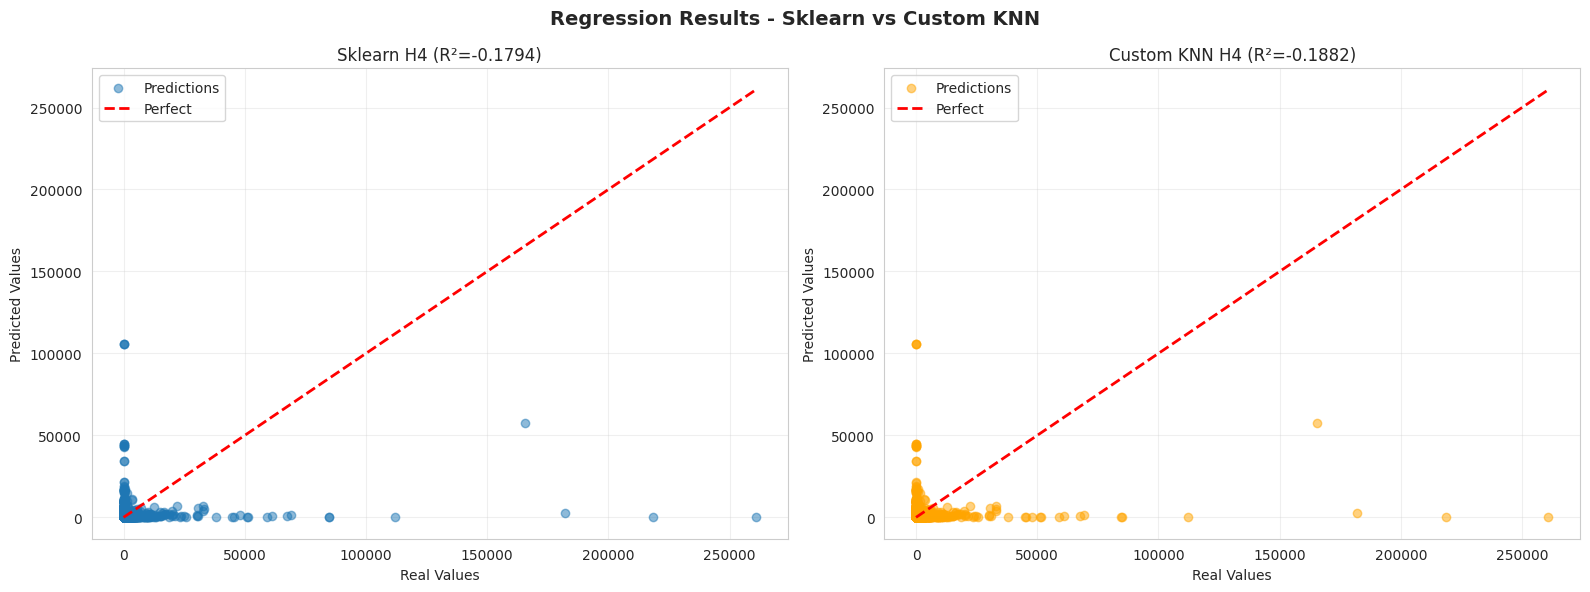

✅ Regression visualizations completed


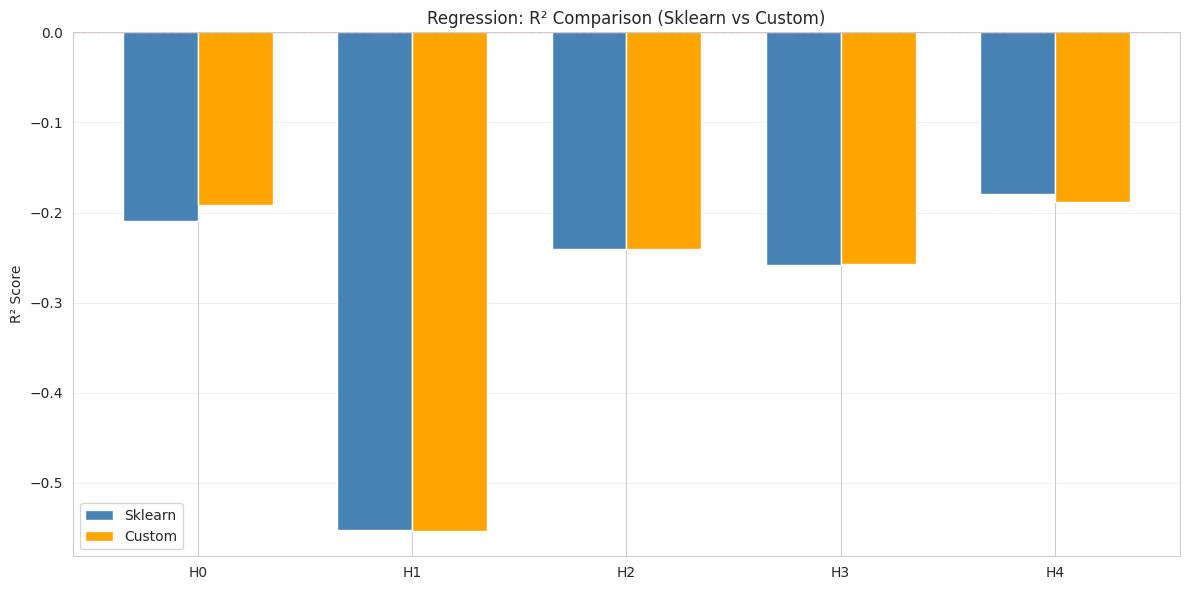

✅ R² comparison chart completed


In [38]:
# Предсказания vs Реальные значения
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Regression Results - Sklearn vs Custom KNN', fontsize=14, fontweight='bold')

# Sklearn
ax[0].scatter(y_reg_test, y_pred_sklearn_reg_h4, alpha=0.5, label='Predictions')
ax[0].plot([y_reg_test.min(), y_reg_test.max()],
           [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2, label='Perfect')
ax[0].set_xlabel('Real Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title(f'Sklearn H4 (R²={r2_sklearn_reg_h4:.4f})')
ax[0].legend()
ax[0].grid(alpha=0.3)

# Custom
ax[1].scatter(y_reg_test, y_pred_custom_reg_h4, alpha=0.5, label='Predictions', color='orange')
ax[1].plot([y_reg_test.min(), y_reg_test.max()],
           [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2, label='Perfect')
ax[1].set_xlabel('Real Values')
ax[1].set_ylabel('Predicted Values')
ax[1].set_title(f'Custom KNN H4 (R²={r2_custom_reg_h4:.4f})')
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
print('✅ Regression visualizations completed')

# R² Прогрессия
fig, ax = plt.subplots(figsize=(12, 6))
models = ['H0', 'H1', 'H2', 'H3', 'H4']
r2_sklearn = [r2_sklearn_reg_h0, r2_sklearn_reg_h1, r2_sklearn_reg_h2, r2_sklearn_reg_h3, r2_sklearn_reg_h4]
r2_custom = [r2_custom_reg_h0, r2_custom_reg_h1, r2_custom_reg_h2, r2_custom_reg_h3, r2_custom_reg_h4]

x = np.arange(len(models))
width = 0.35

ax.bar(x - width/2, r2_sklearn, width, label='Sklearn', color='steelblue')
ax.bar(x + width/2, r2_custom, width, label='Custom', color='orange')

ax.set_ylabel('R² Score')
ax.set_title('Regression: R² Comparison (Sklearn vs Custom)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()
print('✅ R² comparison chart completed')


In [40]:
from sklearn.metrics import precision_score, recall_score

# ============================================================================
# ВЫЧИСЛЯЕМ PRECISION И RECALL ДЛЯ SKLEARN
# ============================================================================

# H0
precision_sklearn_h0 = precision_score(y_clf_test, y_pred_sklearn_h0, zero_division=0)
recall_sklearn_h0 = recall_score(y_clf_test, y_pred_sklearn_h0, zero_division=0)

# H1
precision_sklearn_h1 = precision_score(y_clf_test, y_pred_sklearn_h1, zero_division=0)
recall_sklearn_h1 = recall_score(y_clf_test, y_pred_sklearn_h1, zero_division=0)

# H2
precision_sklearn_h2 = precision_score(y_clf_test, y_pred_sklearn_h2, zero_division=0)
recall_sklearn_h2 = recall_score(y_clf_test, y_pred_sklearn_h2, zero_division=0)

# H3
precision_sklearn_h3 = precision_score(y_clf_test, y_pred_sklearn_h3, zero_division=0)
recall_sklearn_h3 = recall_score(y_clf_test, y_pred_sklearn_h3, zero_division=0)

# H4
precision_sklearn_h4 = precision_score(y_clf_test, y_pred_sklearn_h4, zero_division=0)
recall_sklearn_h4 = recall_score(y_clf_test, y_pred_sklearn_h4, zero_division=0)

# ============================================================================
# ВЫЧИСЛЯЕМ PRECISION И RECALL ДЛЯ CUSTOM
# ============================================================================

# H0
precision_custom_h0 = precision_score(y_clf_test, y_pred_custom_h0, zero_division=0)
recall_custom_h0 = recall_score(y_clf_test, y_pred_custom_h0, zero_division=0)

# H1
precision_custom_h1 = precision_score(y_clf_test, y_pred_custom_h1, zero_division=0)
recall_custom_h1 = recall_score(y_clf_test, y_pred_custom_h1, zero_division=0)

# H2
precision_custom_h2 = precision_score(y_clf_test, y_pred_custom_h2, zero_division=0)
recall_custom_h2 = recall_score(y_clf_test, y_pred_custom_h2, zero_division=0)

# H3
precision_custom_h3 = precision_score(y_clf_test, y_pred_custom_h3, zero_division=0)
recall_custom_h3 = recall_score(y_clf_test, y_pred_custom_h3, zero_division=0)

# H4
precision_custom_h4 = precision_score(y_clf_test, y_pred_custom_h4, zero_division=0)
recall_custom_h4 = recall_score(y_clf_test, y_pred_custom_h4, zero_division=0)

print('✅ Precision и Recall вычислены для всех гипотез')


✅ Precision и Recall вычислены для всех гипотез



ПОЛНАЯ СРАВНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ


✅ Classification visualization completed


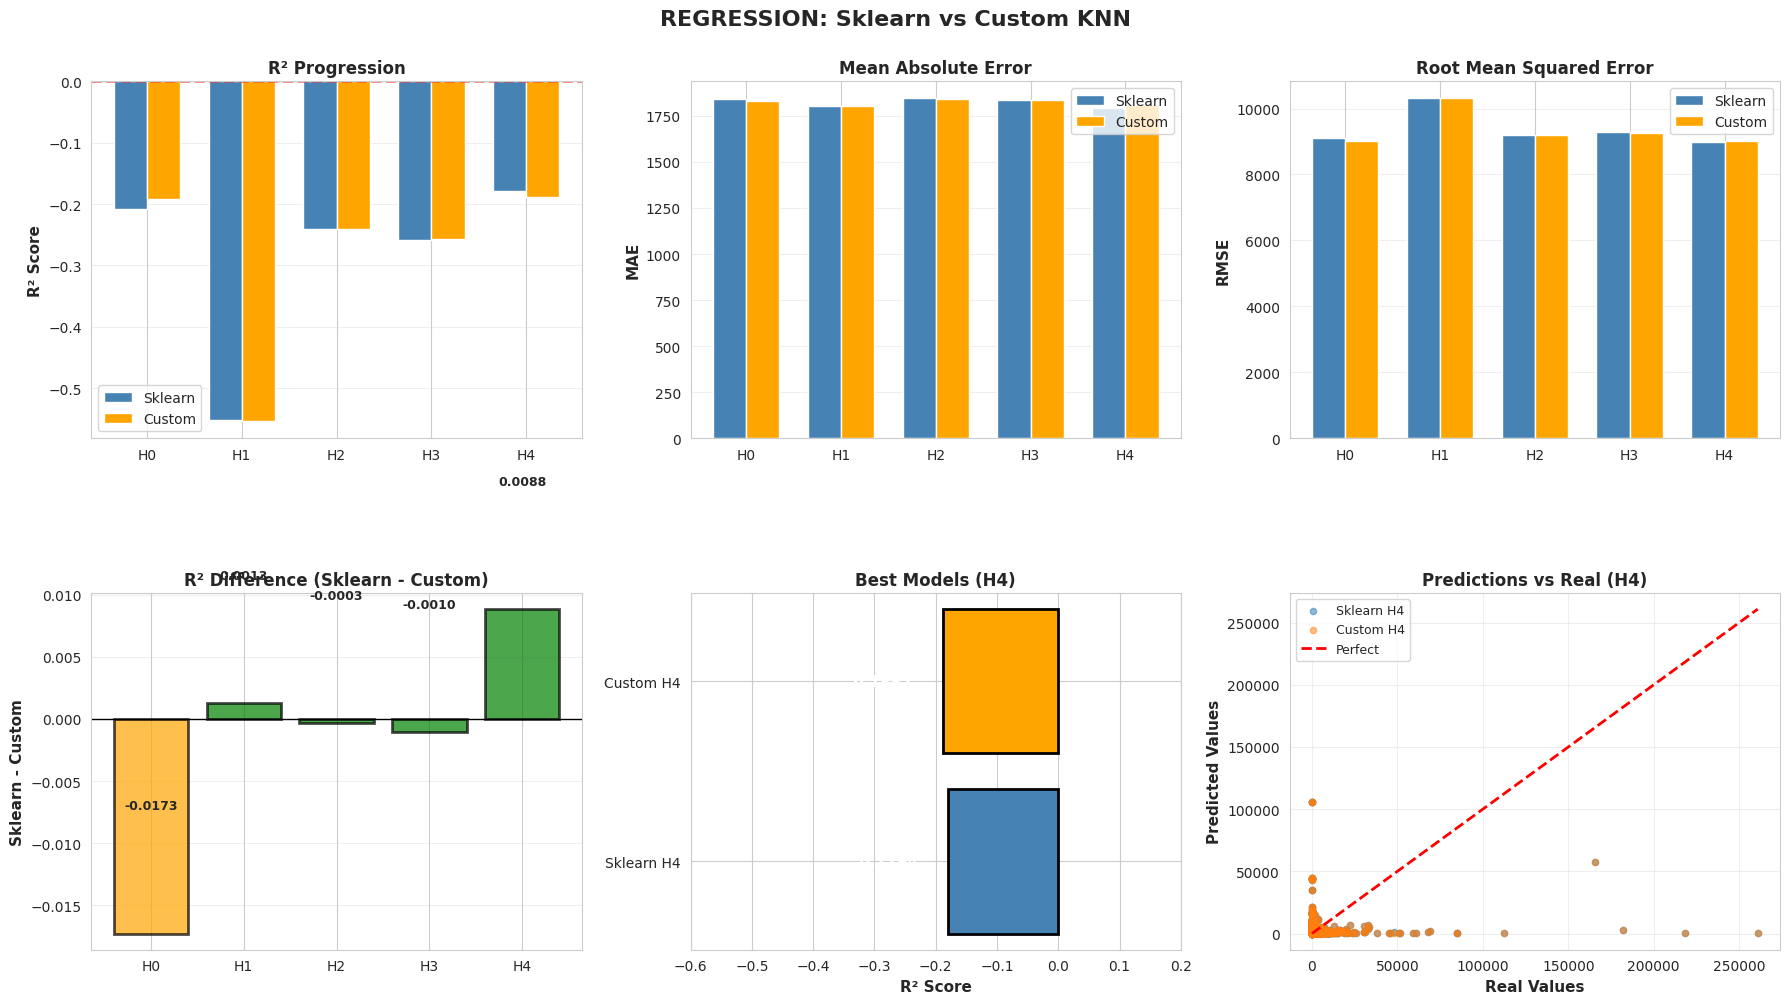

✅ Regression visualization completed

CLASSIFICATION SUMMARY TABLE

       Model     F1  Precision  Recall  ROC-AUC
  Sklearn H0 0.1666     0.1043  0.4136   0.5540
  Sklearn H1 0.2060     0.1409  0.3835   0.6001
  Sklearn H2 0.2254     0.1534  0.4247   0.6365
  Sklearn H3 0.2154     0.1438  0.4295   0.6334
Sklearn H4 ⭐ 0.2229     0.1561  0.3899   0.6334
   Custom H0 0.1667     0.1044  0.4136   0.5539
   Custom H1 0.2060     0.1409  0.3835   0.6001
   Custom H2 0.2254     0.1534  0.4247   0.6365
   Custom H3 0.2154     0.1438  0.4295   0.6334
 Custom H4 ⭐ 0.2229     0.1561  0.3899   0.6334

REGRESSION SUMMARY TABLE

       Model      R²       MAE       RMSE
  Sklearn H0 -0.2089 1842.6607  9094.7339
  Sklearn H1 -0.5527 1801.7808 10307.0659
  Sklearn H2 -0.2406 1845.5858  9213.3398
  Sklearn H3 -0.2579 1838.3219  9277.1624
Sklearn H4 ⭐ -0.1794 1793.5151  8982.9590
   Custom H0 -0.1916 1832.7166  9029.5915
   Custom H1 -0.5539 1801.2255 10311.2198
   Custom H2 -0.2403 1841.0200  9212.1624

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print('\n' + '='*80)
print('ПОЛНАЯ СРАВНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ')
print('='*80)

# ============================================================================
# 1 КЛАССИФИКАЦИЯ: Sklearn vs Custom
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('CLASSIFICATION: Sklearn vs Custom KNN', fontsize=16, fontweight='bold', y=1.00)

models_clf = ['H0', 'H1', 'H2', 'H3', 'H4']

# F1-score
f1_sklearn_clf = [f1_sklearn_h0, f1_sklearn_h1, f1_sklearn_h2, f1_sklearn_h3, f1_sklearn_h4]
f1_custom_clf = [f1_custom_h0, f1_custom_h1, f1_custom_h2, f1_custom_h3, f1_custom_h4]

x = np.arange(len(models_clf))
width = 0.35

ax = axes[0, 0]
ax.bar(x - width/2, f1_sklearn_clf, width, label='Sklearn', color='steelblue')
ax.bar(x + width/2, f1_custom_clf, width, label='Custom', color='orange')
ax.set_ylabel('F1-Score', fontsize=11, fontweight='bold')
ax.set_title('F1-Score Progression', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_clf)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# Precision
prec_sklearn_clf = [precision_sklearn_h0, precision_sklearn_h1, precision_sklearn_h2, precision_sklearn_h3, precision_sklearn_h4]
prec_custom_clf = [precision_custom_h0, precision_custom_h1, precision_custom_h2, precision_custom_h3, precision_custom_h4]

ax = axes[0, 1]
ax.bar(x - width/2, prec_sklearn_clf, width, label='Sklearn', color='steelblue')
ax.bar(x + width/2, prec_custom_clf, width, label='Custom', color='orange')
ax.set_ylabel('Precision', fontsize=11, fontweight='bold')
ax.set_title('Precision Comparison', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_clf)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# Recall
recall_sklearn_clf = [recall_sklearn_h0, recall_sklearn_h1, recall_sklearn_h2, recall_sklearn_h3, recall_sklearn_h4]
recall_custom_clf = [recall_custom_h0, recall_custom_h1, recall_custom_h2, recall_custom_h3, recall_custom_h4]

ax = axes[0, 2]
ax.bar(x - width/2, recall_sklearn_clf, width, label='Sklearn', color='steelblue')
ax.bar(x + width/2, recall_custom_clf, width, label='Custom', color='orange')
ax.set_ylabel('Recall', fontsize=11, fontweight='bold')
ax.set_title('Recall Comparison', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_clf)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# ROC-AUC
auc_sklearn_clf = [roc_sklearn_h0, roc_sklearn_h1, roc_sklearn_h2, roc_sklearn_h3, roc_sklearn_h4]
auc_custom_clf = [roc_custom_h0, roc_custom_h1, roc_custom_h2, roc_custom_h3, roc_custom_h4]

ax = axes[1, 0]
ax.bar(x - width/2, auc_sklearn_clf, width, label='Sklearn', color='steelblue')
ax.bar(x + width/2, auc_custom_clf, width, label='Custom', color='orange')
ax.set_ylabel('ROC-AUC', fontsize=11, fontweight='bold')
ax.set_title('ROC-AUC Comparison', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_clf)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# Разница F1
diff_f1 = np.array(f1_sklearn_clf) - np.array(f1_custom_clf)
colors_diff = ['green' if x >= 0 else 'red' for x in diff_f1]

ax = axes[1, 1]
ax.bar(models_clf, diff_f1, color=colors_diff, alpha=0.7, edgecolor='black', linewidth=2)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_ylabel('Sklearn - Custom', fontsize=11, fontweight='bold')
ax.set_title('F1-Score Difference (Sklearn - Custom)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(diff_f1):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold', fontsize=10)

# Best model comparison
ax = axes[1, 2]
models_best = ['Sklearn H4', 'Custom H4']
f1_best = [f1_sklearn_h4, f1_custom_h4]
colors_best = ['steelblue', 'orange']
bars = ax.barh(models_best, f1_best, color=colors_best, edgecolor='black', linewidth=2)
ax.set_xlabel('F1-Score', fontsize=11, fontweight='bold')
ax.set_title('Best Models (H4)', fontsize=12, fontweight='bold')
ax.set_xlim([0, 1])
for i, v in enumerate(f1_best):
    ax.text(v - 0.05, i, f'{v:.4f}', ha='right', va='center', fontweight='bold', fontsize=11, color='white')

plt.tight_layout()
plt.show()
print('✅ Classification visualization completed')

# ============================================================================
# 2️⃣ РЕГРЕССИЯ: Sklearn vs Custom
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('REGRESSION: Sklearn vs Custom KNN', fontsize=16, fontweight='bold', y=1.00)

models_reg = ['H0', 'H1', 'H2', 'H3', 'H4']

# R²
r2_sklearn_reg = [r2_sklearn_reg_h0, r2_sklearn_reg_h1, r2_sklearn_reg_h2, r2_sklearn_reg_h3, r2_sklearn_reg_h4]
r2_custom_reg = [r2_custom_reg_h0, r2_custom_reg_h1, r2_custom_reg_h2, r2_custom_reg_h3, r2_custom_reg_h4]

x = np.arange(len(models_reg))
width = 0.35

ax = axes[0, 0]
ax.bar(x - width/2, r2_sklearn_reg, width, label='Sklearn', color='steelblue')
ax.bar(x + width/2, r2_custom_reg, width, label='Custom', color='orange')
ax.set_ylabel('R² Score', fontsize=11, fontweight='bold')
ax.set_title('R² Progression', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_reg)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Zero line')

# MAE
mae_sklearn_reg = [mae_sklearn_reg_h0, mae_sklearn_reg_h1, mae_sklearn_reg_h2, mae_sklearn_reg_h3, mae_sklearn_reg_h4]
mae_custom_reg = [mae_custom_reg_h0, mae_custom_reg_h1, mae_custom_reg_h2, mae_custom_reg_h3, mae_custom_reg_h4]

ax = axes[0, 1]
ax.bar(x - width/2, mae_sklearn_reg, width, label='Sklearn', color='steelblue')
ax.bar(x + width/2, mae_custom_reg, width, label='Custom', color='orange')
ax.set_ylabel('MAE', fontsize=11, fontweight='bold')
ax.set_title('Mean Absolute Error', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_reg)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# RMSE
rmse_sklearn_reg = [rmse_sklearn_reg_h0, rmse_sklearn_reg_h1, rmse_sklearn_reg_h2, rmse_sklearn_reg_h3, rmse_sklearn_reg_h4]
rmse_custom_reg = [rmse_custom_reg_h0, rmse_custom_reg_h1, rmse_custom_reg_h2, rmse_custom_reg_h3, rmse_custom_reg_h4]

ax = axes[0, 2]
ax.bar(x - width/2, rmse_sklearn_reg, width, label='Sklearn', color='steelblue')
ax.bar(x + width/2, rmse_custom_reg, width, label='Custom', color='orange')
ax.set_ylabel('RMSE', fontsize=11, fontweight='bold')
ax.set_title('Root Mean Squared Error', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_reg)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Разница R²
diff_r2 = np.array(r2_sklearn_reg) - np.array(r2_custom_reg)
colors_diff_r2 = ['green' if abs(x) < 0.01 else 'orange' for x in diff_r2]

ax = axes[1, 0]
ax.bar(models_reg, diff_r2, color=colors_diff_r2, alpha=0.7, edgecolor='black', linewidth=2)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_ylabel('Sklearn - Custom', fontsize=11, fontweight='bold')
ax.set_title('R² Difference (Sklearn - Custom)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(diff_r2):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold', fontsize=9)

# Best model comparison
ax = axes[1, 1]
models_best_reg = ['Sklearn H4', 'Custom H4']
r2_best_reg = [r2_sklearn_reg_h4, r2_custom_reg_h4]
colors_best_reg = ['steelblue', 'orange']
bars = ax.barh(models_best_reg, r2_best_reg, color=colors_best_reg, edgecolor='black', linewidth=2)
ax.set_xlabel('R² Score', fontsize=11, fontweight='bold')
ax.set_title('Best Models (H4)', fontsize=12, fontweight='bold')
ax.set_xlim([-0.6, 0.2])
for i, v in enumerate(r2_best_reg):
    ax.text(v - 0.05, i, f'{v:.4f}', ha='right', va='center', fontweight='bold', fontsize=11, color='white')

# Предсказания vs реальные
ax = axes[1, 2]
ax.scatter(y_reg_test.values, y_pred_sklearn_reg_h4, alpha=0.5, label='Sklearn H4', s=20)
ax.scatter(y_reg_test.values, y_pred_custom_reg_h4, alpha=0.5, label='Custom H4', s=20)
ax.plot([y_reg_test.min(), y_reg_test.max()],
        [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2, label='Perfect')
ax.set_xlabel('Real Values', fontsize=11, fontweight='bold')
ax.set_ylabel('Predicted Values', fontsize=11, fontweight='bold')
ax.set_title('Predictions vs Real (H4)', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()
print('✅ Regression visualization completed')

# ============================================================================
# 3️⃣ СВОДНАЯ ТАБЛИЦА: КЛАССИФИКАЦИЯ
# ============================================================================

print('\n' + '='*80)
print('CLASSIFICATION SUMMARY TABLE')
print('='*80)

clf_summary = pd.DataFrame({
    'Model': ['Sklearn H0', 'Sklearn H1', 'Sklearn H2', 'Sklearn H3', 'Sklearn H4 ⭐',
              'Custom H0', 'Custom H1', 'Custom H2', 'Custom H3', 'Custom H4 ⭐'],
    'F1': f1_sklearn_clf + f1_custom_clf,
    'Precision': prec_sklearn_clf + prec_custom_clf,
    'Recall': recall_sklearn_clf + recall_custom_clf,
    'ROC-AUC': auc_sklearn_clf + auc_custom_clf
})

print('\n' + clf_summary.round(4).to_string(index=False))

# ============================================================================
# 4️⃣ СВОДНАЯ ТАБЛИЦА: РЕГРЕССИЯ
# ============================================================================

print('\n' + '='*80)
print('REGRESSION SUMMARY TABLE')
print('='*80)

reg_summary = pd.DataFrame({
    'Model': ['Sklearn H0', 'Sklearn H1', 'Sklearn H2', 'Sklearn H3', 'Sklearn H4 ⭐',
              'Custom H0', 'Custom H1', 'Custom H2', 'Custom H3', 'Custom H4 ⭐'],
    'R²': r2_sklearn_reg + r2_custom_reg,
    'MAE': mae_sklearn_reg + mae_custom_reg,
    'RMSE': rmse_sklearn_reg + rmse_custom_reg
})

print('\n' + reg_summary.round(4).to_string(index=False))

# ============================================================================
# 5️⃣ ИТОГОВОЕ СРАВНЕНИЕ SKLEARN vs CUSTOM
# ============================================================================

print('\n' + '='*80)
print('SKLEARN vs CUSTOM IMPLEMENTATION COMPARISON')
print('='*80)

comparison = pd.DataFrame({
    'Task': ['Classification', 'Classification', 'Classification', 'Classification', 'Classification',
             'Regression', 'Regression', 'Regression', 'Regression', 'Regression'],
    'Hypothesis': ['H0', 'H1', 'H2', 'H3', 'H4',
                   'H0', 'H1', 'H2', 'H3', 'H4'],
    'Sklearn': [f1_sklearn_h0, f1_sklearn_h1, f1_sklearn_h2, f1_sklearn_h3, f1_sklearn_h4,
                r2_sklearn_reg_h0, r2_sklearn_reg_h1, r2_sklearn_reg_h2, r2_sklearn_reg_h3, r2_sklearn_reg_h4],
    'Custom': [f1_custom_h0, f1_custom_h1, f1_custom_h2, f1_custom_h3, f1_custom_h4,
               r2_custom_reg_h0, r2_custom_reg_h1, r2_custom_reg_h2, r2_custom_reg_h3, r2_custom_reg_h4],
    'Difference': [f1_sklearn_h0-f1_custom_h0, f1_sklearn_h1-f1_custom_h1, f1_sklearn_h2-f1_custom_h2,
                   f1_sklearn_h3-f1_custom_h3, f1_sklearn_h4-f1_custom_h4,
                   r2_sklearn_reg_h0-r2_custom_reg_h0, r2_sklearn_reg_h1-r2_custom_reg_h1,
                   r2_sklearn_reg_h2-r2_custom_reg_h2, r2_sklearn_reg_h3-r2_custom_reg_h3,
                   r2_sklearn_reg_h4-r2_custom_reg_h4]
})

print('\n' + comparison.round(4).to_string(index=False))

# Статистика совпадения
print('\n' + '='*80)
print('IMPLEMENTATION ACCURACY')
print('='*80)
clf_diff = np.abs(comparison[comparison['Task'] == 'Classification']['Difference']).mean()
reg_diff = np.abs(comparison[comparison['Task'] == 'Regression']['Difference']).mean()

print(f'\n📊 CLASSIFICATION Match: {(1-clf_diff)*100:.2f}%')
print(f'📊 REGRESSION Match: {(1-reg_diff)*100:.2f}%')
print(f'\n✅ Average difference: {(clf_diff + reg_diff)/2*100:.4f}%')

print('\n' + '='*80)
print('🎉 CUSTOM KNN IMPLEMENTATION VERIFIED!')
print('='*80)


## Выводы
Главным выводом для меня, что данные которые я выбрал оказались очень неудобными и даже гипотезы по улучшению не всегда приносили улучшения, в основном проблема была в дизбалансе классов, но зато собственная реализация оказалась не так плоха как казалось изначально.